In [145]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 25 21:26:53 2019

@author: user_PC
"""
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
#from numpy.random import seed
#seed(1)
pd.options.display.max_columns = 500 
#########

In [4]:
from sklearn.metrics import roc_auc_score
from tensorflow.keras.callbacks import Callback
################
iterations = 120
epochss = 40
###############
auc_list = [0]*epochss

class roc_callback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]


    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        y_pred = self.model.predict(self.x)
        y_pred = [x[1] for x in y_pred]
       
        roc = roc_auc_score(self.y, y_pred)
        y_pred_val = self.model.predict(self.x_val)
        y_pred_val = [x[1] for x in y_pred_val]
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        auc_list[epoch] += roc_val
        print('\rroc-auc: %s - roc-auc_val: %s' % (str(round(roc,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return


In [5]:
input_file = '../../trends_data/sbet_gleb/normal_trends_outofdublers_norm_graded.csv'
df = pd.read_csv(input_file, header= 0, error_bad_lines=False)


# DEEP LEARNING

In [6]:
epoch_list = list(range(epochss))
acc_val = [0]*epochss
for i in range (iterations):

    df = pd.read_csv(input_file, header= 0, error_bad_lines=False)
    Y_set = df['average_grade']
    X_set = df.drop(columns=[ 'average_grade'])
    index_list_of_whole_dataset = list(range(len(Y_set)))
    
    group_of_items = index_list_of_whole_dataset               # a sequence or set will work here.
    num_to_select = int(len(Y_set)/4)                           # set the number to select here.
    list_of_random_items = random.sample(group_of_items, num_to_select)
    list_of_test_index = list_of_random_items
    list_of_train_index = [x for x in index_list_of_whole_dataset if x not in list_of_test_index]
    
    X_train = X_set.loc[list_of_train_index].values.tolist()
    X_test = X_set.loc[list_of_test_index].values.tolist()
    #print( Y_set.loc[list_of_train_index].describe())
    Y_train = Y_set.loc[list_of_train_index].values.tolist()
    #print( Y_set.loc[list_of_test_index].describe())
    Y_test= Y_set.loc[list_of_test_index].values.tolist()
    #time.sleep(10)
    
    X_train = np.array([np.array(x) for x in X_train])
    X_test = np.array([np.array(x) for x in X_test])
    Y_train = np.array([np.array(x) for x in Y_train])
    Y_test = np.array([np.array(x) for x in Y_test])
    
    
    model = tf.keras.models.Sequential()  # a basic feed-forward model
    model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
    model.add(tf.keras.layers.Dense(1000, activation=tf.nn.relu))  # tanh
#    model.add(tf.keras.layers.Dense(100, activation=tf.nn.sigmoid))  #sigmoid
#    model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))  # relu
    model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution
    model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])#=tf.train.AdamOptimizer(learning_rate=0.000005, beta1=0.9, beta2=0.99, epsilon=1e-08),   # Good default optimizer to start with
    history  = model.fit(X_train, Y_train, epochs=epochss, validation_data=(X_test, Y_test), callbacks=[roc_callback(training_data=(X_train, Y_train),validation_data=(X_test, Y_test))])#, 
    for indx, i in enumerate(history.history['val_acc']):
        acc_val[indx] += i 
        
acc_val = [x/iterations for x in acc_val]
auc_list = [x/iterations for x in auc_list]

Train on 549 samples, validate on 183 samples
Epoch 1/40
roc-auc: 0.5861 - roc-auc_val: 0.4812                                                                                                    
549/549 [==============================] - 3s 6ms/step - loss: 0.6991 - acc: 0.4973 - val_loss: 0.7014 - val_acc: 0.4699
Epoch 2/40
roc-auc: 0.6153 - roc-auc_val: 0.5222                                                                                                    
549/549 [==============================] - 0s 124us/step - loss: 0.6906 - acc: 0.5301 - val_loss: 0.6905 - val_acc: 0.5246
Epoch 3/40
roc-auc: 0.6014 - roc-auc_val: 0.4869                                                                                                    
549/549 [==============================] - 0s 139us/step - loss: 0.6868 - acc: 0.5464 - val_loss: 0.7057 - val_acc: 0.4809
Epoch 4/40
roc-auc: 0.6229 - roc-auc_val: 0.5078                                                                                            

Epoch 31/40
roc-auc: 0.7341 - roc-auc_val: 0.5447                                                                                                    
549/549 [==============================] - 0s 106us/step - loss: 0.6245 - acc: 0.6430 - val_loss: 0.7229 - val_acc: 0.5246
Epoch 32/40
roc-auc: 0.7375 - roc-auc_val: 0.5434                                                                                                    
549/549 [==============================] - 0s 104us/step - loss: 0.6190 - acc: 0.6430 - val_loss: 0.7138 - val_acc: 0.4809
Epoch 33/40
roc-auc: 0.7273 - roc-auc_val: 0.5386                                                                                                    
549/549 [==============================] - 0s 104us/step - loss: 0.6178 - acc: 0.6612 - val_loss: 0.7777 - val_acc: 0.4973
Epoch 34/40
roc-auc: 0.7436 - roc-auc_val: 0.5676                                                                                                    
549/549 [======================

Epoch 21/40
roc-auc: 0.7224 - roc-auc_val: 0.4769                                                                                                    
549/549 [==============================] - 0s 104us/step - loss: 0.6410 - acc: 0.6193 - val_loss: 0.7279 - val_acc: 0.4863
Epoch 22/40
roc-auc: 0.7177 - roc-auc_val: 0.4687..] - ETA: 0s - loss: 0.6375 - acc: 0.5625                                                                                                    
549/549 [==============================] - 0s 110us/step - loss: 0.6353 - acc: 0.6339 - val_loss: 0.7469 - val_acc: 0.4536
Epoch 23/40
roc-auc: 0.724 - roc-auc_val: 0.4824                                                                                                    
549/549 [==============================] - 0s 104us/step - loss: 0.6269 - acc: 0.6503 - val_loss: 0.7303 - val_acc: 0.4536
Epoch 24/40
roc-auc: 0.7228 - roc-auc_val: 0.4596                                                                                           

Epoch 11/40
roc-auc: 0.671 - roc-auc_val: 0.5496                                                                                                    
549/549 [==============================] - 0s 104us/step - loss: 0.6651 - acc: 0.5774 - val_loss: 0.7035 - val_acc: 0.4809
Epoch 12/40
roc-auc: 0.6668 - roc-auc_val: 0.5591                                                                                                    
549/549 [==============================] - 0s 104us/step - loss: 0.6576 - acc: 0.5974 - val_loss: 0.7062 - val_acc: 0.5464
Epoch 13/40
roc-auc: 0.6805 - roc-auc_val: 0.545                                                                                                    
549/549 [==============================] - 0s 106us/step - loss: 0.6543 - acc: 0.6029 - val_loss: 0.7205 - val_acc: 0.4973
Epoch 14/40
roc-auc: 0.6859 - roc-auc_val: 0.5591                                                                                                    
549/549 [========================

roc-auc: 0.5879 - roc-auc_val: 0.4521                                                                                                    
549/549 [==============================] - 0s 754us/step - loss: 0.7004 - acc: 0.4699 - val_loss: 0.7010 - val_acc: 0.4645
Epoch 2/40
roc-auc: 0.6313 - roc-auc_val: 0.4701                                                                                                    
549/549 [==============================] - 0s 128us/step - loss: 0.6904 - acc: 0.5501 - val_loss: 0.7059 - val_acc: 0.4863
Epoch 3/40
roc-auc: 0.6258 - roc-auc_val: 0.5167                                                                                                    
549/549 [==============================] - 0s 119us/step - loss: 0.6879 - acc: 0.5337 - val_loss: 0.6953 - val_acc: 0.5464
Epoch 4/40
roc-auc: 0.6348 - roc-auc_val: 0.4976                                                                                                    
549/549 [==============================] - 0s 

Epoch 31/40
roc-auc: 0.7604 - roc-auc_val: 0.4703..] - ETA: 0s - loss: 0.6559 - acc: 0.5938                                                                                                    
549/549 [==============================] - 0s 117us/step - loss: 0.6149 - acc: 0.6521 - val_loss: 0.7451 - val_acc: 0.4863
Epoch 32/40
roc-auc: 0.7555 - roc-auc_val: 0.4925..] - ETA: 0s - loss: 0.6281 - acc: 0.7188                                                                                                    
549/549 [==============================] - 0s 124us/step - loss: 0.6167 - acc: 0.6776 - val_loss: 0.7410 - val_acc: 0.5027
Epoch 33/40
roc-auc: 0.7679 - roc-auc_val: 0.4785..] - ETA: 0s - loss: 0.6369 - acc: 0.6250                                                                                                    
549/549 [==============================] - 0s 130us/step - loss: 0.6168 - acc: 0.6630 - val_loss: 0.7378 - val_acc: 0.4754
Epoch 34/40
roc-auc: 0.7641 - roc-auc_val: 0.4822      

roc-auc: 0.7243 - roc-auc_val: 0.5259                                                                                                    
549/549 [==============================] - 0s 115us/step - loss: 0.6351 - acc: 0.6430 - val_loss: 0.7168 - val_acc: 0.5082
Epoch 21/40
roc-auc: 0.7219 - roc-auc_val: 0.5264                                                                                                    
549/549 [==============================] - 0s 115us/step - loss: 0.6350 - acc: 0.6266 - val_loss: 0.7158 - val_acc: 0.5301
Epoch 22/40
roc-auc: 0.7201 - roc-auc_val: 0.5336                                                                                                    
549/549 [==============================] - 0s 144us/step - loss: 0.6319 - acc: 0.6321 - val_loss: 0.7268 - val_acc: 0.4754
Epoch 23/40
roc-auc: 0.7315 - roc-auc_val: 0.5264                                                                                                    
549/549 [==============================] - 

Epoch 10/40
roc-auc: 0.6653 - roc-auc_val: 0.4983                                                                                                    
549/549 [==============================] - 0s 115us/step - loss: 0.6623 - acc: 0.5956 - val_loss: 0.7073 - val_acc: 0.5137
Epoch 11/40
roc-auc: 0.6624 - roc-auc_val: 0.4967                                                                                                    
549/549 [==============================] - 0s 110us/step - loss: 0.6663 - acc: 0.5647 - val_loss: 0.7149 - val_acc: 0.5137
Epoch 12/40
roc-auc: 0.6678 - roc-auc_val: 0.5151                                                                                                    
549/549 [==============================] - 0s 106us/step - loss: 0.6597 - acc: 0.5902 - val_loss: 0.7149 - val_acc: 0.5191
Epoch 13/40
roc-auc: 0.6732 - roc-auc_val: 0.5032                                                                                                    
549/549 [======================

roc-auc: 0.7649 - roc-auc_val: 0.5387                                                                                                    
549/549 [==============================] - 0s 113us/step - loss: 0.6010 - acc: 0.6721 - val_loss: 0.7410 - val_acc: 0.5027
Epoch 40/40
roc-auc: 0.771 - roc-auc_val: 0.5305                                                                                                    
549/549 [==============================] - 0s 106us/step - loss: 0.5968 - acc: 0.6630 - val_loss: 0.7418 - val_acc: 0.4863
Train on 549 samples, validate on 183 samples
Epoch 1/40
roc-auc: 0.6026 - roc-auc_val: 0.5171..] - ETA: 5s - loss: 0.6803 - acc: 0.5625                                                                                                    
549/549 [==============================] - 1s 942us/step - loss: 0.6962 - acc: 0.5009 - val_loss: 0.6960 - val_acc: 0.5082
Epoch 2/40
roc-auc: 0.6041 - roc-auc_val: 0.4648                                                           

Epoch 29/40
roc-auc: 0.757 - roc-auc_val: 0.4719                                                                                                    
549/549 [==============================] - 0s 108us/step - loss: 0.6155 - acc: 0.6485 - val_loss: 0.7512 - val_acc: 0.4809
Epoch 30/40
roc-auc: 0.7488 - roc-auc_val: 0.4939                                                                                                    
549/549 [==============================] - 0s 117us/step - loss: 0.6079 - acc: 0.6630 - val_loss: 0.7429 - val_acc: 0.4754
Epoch 31/40
roc-auc: 0.7631 - roc-auc_val: 0.5022                                                                                                    
549/549 [==============================] - 0s 106us/step - loss: 0.6082 - acc: 0.6503 - val_loss: 0.7379 - val_acc: 0.4754
Epoch 32/40
roc-auc: 0.7665 - roc-auc_val: 0.4827                                                                                                    
549/549 [=======================

Epoch 19/40
roc-auc: 0.7123 - roc-auc_val: 0.5413                                                                                                    
549/549 [==============================] - 0s 110us/step - loss: 0.6440 - acc: 0.6339 - val_loss: 0.7171 - val_acc: 0.5246
Epoch 20/40
roc-auc: 0.6982 - roc-auc_val: 0.519                                                                                                    
549/549 [==============================] - 0s 108us/step - loss: 0.6384 - acc: 0.6266 - val_loss: 0.7200 - val_acc: 0.5574
Epoch 21/40
roc-auc: 0.7209 - roc-auc_val: 0.551                                                                                                    
549/549 [==============================] - 0s 110us/step - loss: 0.6408 - acc: 0.6120 - val_loss: 0.7303 - val_acc: 0.5191
Epoch 22/40
roc-auc: 0.7216 - roc-auc_val: 0.5374                                                                                                    
549/549 [========================

Epoch 9/40
roc-auc: 0.6522 - roc-auc_val: 0.5448                                                                                                    
549/549 [==============================] - 0s 119us/step - loss: 0.6724 - acc: 0.5719 - val_loss: 0.7062 - val_acc: 0.5410
Epoch 10/40
roc-auc: 0.6535 - roc-auc_val: 0.5505                                                                                                    
549/549 [==============================] - 0s 115us/step - loss: 0.6715 - acc: 0.5501 - val_loss: 0.7025 - val_acc: 0.5246
Epoch 11/40
roc-auc: 0.657 - roc-auc_val: 0.5516                                                                                                    
549/549 [==============================] - 0s 117us/step - loss: 0.6662 - acc: 0.5683 - val_loss: 0.6936 - val_acc: 0.5519
Epoch 12/40
roc-auc: 0.6727 - roc-auc_val: 0.5336                                                                                                    
549/549 [========================

roc-auc: 0.7827 - roc-auc_val: 0.5028                                                                                                    
549/549 [==============================] - 0s 110us/step - loss: 0.6027 - acc: 0.6576 - val_loss: 0.7441 - val_acc: 0.4973
Epoch 40/40
roc-auc: 0.7868 - roc-auc_val: 0.4945                                                                                                    
549/549 [==============================] - 0s 113us/step - loss: 0.5854 - acc: 0.7013 - val_loss: 0.7527 - val_acc: 0.4699
Train on 549 samples, validate on 183 samples
Epoch 1/40
roc-auc: 0.5705 - roc-auc_val: 0.4809                                                                                                    
549/549 [==============================] - 1s 1ms/step - loss: 0.7030 - acc: 0.4809 - val_loss: 0.7049 - val_acc: 0.4809
Epoch 2/40
roc-auc: 0.6048 - roc-auc_val: 0.5173                                                                                                    
5

Epoch 29/40
roc-auc: 0.7257 - roc-auc_val: 0.6007                                                                                                    
549/549 [==============================] - 0s 111us/step - loss: 0.6467 - acc: 0.6102 - val_loss: 0.6802 - val_acc: 0.6066
Epoch 30/40
roc-auc: 0.7175 - roc-auc_val: 0.5719                                                                                                    
549/549 [==============================] - 0s 111us/step - loss: 0.6424 - acc: 0.6084 - val_loss: 0.6976 - val_acc: 0.5902
Epoch 31/40
roc-auc: 0.738 - roc-auc_val: 0.5859                                                                                                    
549/549 [==============================] - 0s 110us/step - loss: 0.6401 - acc: 0.6230 - val_loss: 0.6853 - val_acc: 0.5574
Epoch 32/40
roc-auc: 0.7387 - roc-auc_val: 0.5878                                                                                                    
549/549 [=======================

roc-auc: 0.69 - roc-auc_val: 0.5345                                                                                                    
549/549 [==============================] - 0s 121us/step - loss: 0.6541 - acc: 0.5956 - val_loss: 0.7136 - val_acc: 0.4809
Epoch 19/40
roc-auc: 0.6843 - roc-auc_val: 0.5299                                                                                                    
549/549 [==============================] - 0s 130us/step - loss: 0.6503 - acc: 0.5938 - val_loss: 0.7348 - val_acc: 0.4918
Epoch 20/40
roc-auc: 0.6878 - roc-auc_val: 0.5282..] - ETA: 0s - loss: 0.7363 - acc: 0.4688                                                                                                    
549/549 [==============================] - 0s 115us/step - loss: 0.6495 - acc: 0.6047 - val_loss: 0.7166 - val_acc: 0.5191
Epoch 21/40
roc-auc: 0.6927 - roc-auc_val: 0.5317                                                                                                    
549

roc-auc: 0.6723 - roc-auc_val: 0.5562                                                                                                    
549/549 [==============================] - 0s 111us/step - loss: 0.6775 - acc: 0.5537 - val_loss: 0.6906 - val_acc: 0.5191
Epoch 8/40
roc-auc: 0.6497 - roc-auc_val: 0.5477                                                                                                    
549/549 [==============================] - 0s 117us/step - loss: 0.6732 - acc: 0.5938 - val_loss: 0.7074 - val_acc: 0.5355
Epoch 9/40
roc-auc: 0.6625 - roc-auc_val: 0.5395                                                                                                    
549/549 [==============================] - 0s 117us/step - loss: 0.6679 - acc: 0.5811 - val_loss: 0.6907 - val_acc: 0.5574
Epoch 10/40
roc-auc: 0.6819 - roc-auc_val: 0.5539..] - ETA: 0s - loss: 0.6635 - acc: 0.6562                                                                                                    
549

Epoch 37/40
roc-auc: 0.7796 - roc-auc_val: 0.5105                                                                                                    
549/549 [==============================] - 0s 115us/step - loss: 0.6052 - acc: 0.6740 - val_loss: 0.7398 - val_acc: 0.5191
Epoch 38/40
roc-auc: 0.7753 - roc-auc_val: 0.5493                                                                                                    
549/549 [==============================] - 0s 113us/step - loss: 0.5991 - acc: 0.6521 - val_loss: 0.7786 - val_acc: 0.4754
Epoch 39/40
roc-auc: 0.7851 - roc-auc_val: 0.5358                                                                                                    
549/549 [==============================] - 0s 124us/step - loss: 0.6024 - acc: 0.6721 - val_loss: 0.7430 - val_acc: 0.5301
Epoch 40/40
roc-auc: 0.794 - roc-auc_val: 0.5191...] - ETA: 0s - loss: 0.5771 - acc: 0.6875                                                                                          

Epoch 27/40
roc-auc: 0.7273 - roc-auc_val: 0.5318                                                                                                    
549/549 [==============================] - 0s 113us/step - loss: 0.6265 - acc: 0.6521 - val_loss: 0.7861 - val_acc: 0.5191
Epoch 28/40
roc-auc: 0.7425 - roc-auc_val: 0.5342                                                                                                    
549/549 [==============================] - 0s 117us/step - loss: 0.6357 - acc: 0.6138 - val_loss: 0.7380 - val_acc: 0.5410
Epoch 29/40
roc-auc: 0.7396 - roc-auc_val: 0.5383                                                                                                    
549/549 [==============================] - 0s 115us/step - loss: 0.6229 - acc: 0.6648 - val_loss: 0.7393 - val_acc: 0.5246
Epoch 30/40
roc-auc: 0.7468 - roc-auc_val: 0.5261                                                                                                    
549/549 [======================

roc-auc: 0.7002 - roc-auc_val: 0.4836                                                                                                    
549/549 [==============================] - 0s 119us/step - loss: 0.6587 - acc: 0.6120 - val_loss: 0.7324 - val_acc: 0.4809
Epoch 17/40
roc-auc: 0.7015 - roc-auc_val: 0.4864                                                                                                    
549/549 [==============================] - 0s 122us/step - loss: 0.6435 - acc: 0.6066 - val_loss: 0.7357 - val_acc: 0.5301
Epoch 18/40
roc-auc: 0.6884 - roc-auc_val: 0.5038                                                                                                    
549/549 [==============================] - 0s 117us/step - loss: 0.6469 - acc: 0.5938 - val_loss: 0.7644 - val_acc: 0.5410
Epoch 19/40
roc-auc: 0.7035 - roc-auc_val: 0.4921                                                                                                    
549/549 [==============================] - 

Epoch 5/40
roc-auc: 0.6403 - roc-auc_val: 0.5389..] - ETA: 0s - loss: 0.6728 - acc: 0.5625                                                                                                    
549/549 [==============================] - 0s 119us/step - loss: 0.6774 - acc: 0.5647 - val_loss: 0.7006 - val_acc: 0.5246
Epoch 6/40
roc-auc: 0.6355 - roc-auc_val: 0.5381                                                                                                    
549/549 [==============================] - 0s 119us/step - loss: 0.6712 - acc: 0.5883 - val_loss: 0.6998 - val_acc: 0.5464
Epoch 7/40
roc-auc: 0.6447 - roc-auc_val: 0.5326..] - ETA: 0s - loss: 0.6770 - acc: 0.5625                                                                                                    
549/549 [==============================] - 0s 128us/step - loss: 0.6713 - acc: 0.5847 - val_loss: 0.7078 - val_acc: 0.5301
Epoch 8/40
roc-auc: 0.6625 - roc-auc_val: 0.5311..] - ETA: 0s - loss: 0.6793 - acc: 0.5312          

Epoch 34/40
roc-auc: 0.7683 - roc-auc_val: 0.53....] - ETA: 0s - loss: 0.6255 - acc: 0.5312                                                                                                    
549/549 [==============================] - 0s 119us/step - loss: 0.6033 - acc: 0.6703 - val_loss: 0.7994 - val_acc: 0.5301
Epoch 35/40
roc-auc: 0.7795 - roc-auc_val: 0.5214                                                                                                    
549/549 [==============================] - 0s 133us/step - loss: 0.5970 - acc: 0.6703 - val_loss: 0.7937 - val_acc: 0.5246
Epoch 36/40
roc-auc: 0.7758 - roc-auc_val: 0.5227..] - ETA: 0s - loss: 0.5465 - acc: 0.8438                                                                                                    
549/549 [==============================] - 0s 130us/step - loss: 0.6008 - acc: 0.6630 - val_loss: 0.7968 - val_acc: 0.5355
Epoch 37/40
roc-auc: 0.7701 - roc-auc_val: 0.5192                                                

Epoch 23/40
roc-auc: 0.7044 - roc-auc_val: 0.5558..] - ETA: 0s - loss: 0.5809 - acc: 0.7188                                                                                                    
549/549 [==============================] - 0s 121us/step - loss: 0.6497 - acc: 0.6120 - val_loss: 0.6997 - val_acc: 0.5191
Epoch 24/40
roc-auc: 0.7177 - roc-auc_val: 0.5595..] - ETA: 0s - loss: 0.6070 - acc: 0.6875                                                                                                    
549/549 [==============================] - 0s 115us/step - loss: 0.6391 - acc: 0.6503 - val_loss: 0.6996 - val_acc: 0.5301
Epoch 25/40
roc-auc: 0.714 - roc-auc_val: 0.5623                                                                                                    
549/549 [==============================] - 0s 122us/step - loss: 0.6402 - acc: 0.6266 - val_loss: 0.6923 - val_acc: 0.5301
Epoch 26/40
roc-auc: 0.7205 - roc-auc_val: 0.5718                                                 

Epoch 12/40
roc-auc: 0.6786 - roc-auc_val: 0.4381                                                                                                    
549/549 [==============================] - 0s 131us/step - loss: 0.6550 - acc: 0.6157 - val_loss: 0.7345 - val_acc: 0.4699
Epoch 13/40
roc-auc: 0.6886 - roc-auc_val: 0.4484..] - ETA: 0s - loss: 0.7090 - acc: 0.5625                                                                                                    
549/549 [==============================] - 0s 122us/step - loss: 0.6472 - acc: 0.6230 - val_loss: 0.7352 - val_acc: 0.4044
Epoch 14/40
roc-auc: 0.6919 - roc-auc_val: 0.4475..] - ETA: 0s - loss: 0.6257 - acc: 0.6562                                                                                                    
549/549 [==============================] - 0s 128us/step - loss: 0.6445 - acc: 0.6211 - val_loss: 0.7386 - val_acc: 0.4262
Epoch 15/40
roc-auc: 0.703 - roc-auc_val: 0.45                                                   

roc-auc: 0.7932 - roc-auc_val: 0.4564                                                                                                    
549/549 [==============================] - 0s 128us/step - loss: 0.5798 - acc: 0.6794 - val_loss: 0.7898 - val_acc: 0.4481
Train on 549 samples, validate on 183 samples
Epoch 1/40
roc-auc: 0.5757 - roc-auc_val: 0.4843                                                                                                    
549/549 [==============================] - 1s 2ms/step - loss: 0.7023 - acc: 0.5319 - val_loss: 0.7400 - val_acc: 0.4918
Epoch 2/40
roc-auc: 0.6009 - roc-auc_val: 0.5321                                                                                                    
549/549 [==============================] - 0s 137us/step - loss: 0.6905 - acc: 0.5519 - val_loss: 0.6933 - val_acc: 0.5410
Epoch 3/40
roc-auc: 0.6168 - roc-auc_val: 0.5223                                                                                                    
54

Epoch 29/40
roc-auc: 0.7568 - roc-auc_val: 0.4988                                                                                                    
549/549 [==============================] - 0s 122us/step - loss: 0.6372 - acc: 0.6175 - val_loss: 0.7472 - val_acc: 0.4645
Epoch 30/40
roc-auc: 0.7411 - roc-auc_val: 0.506                                                                                                    
549/549 [==============================] - 0s 119us/step - loss: 0.6229 - acc: 0.6503 - val_loss: 0.7670 - val_acc: 0.4536
Epoch 31/40
roc-auc: 0.7567 - roc-auc_val: 0.4937                                                                                                    
549/549 [==============================] - 0s 119us/step - loss: 0.6126 - acc: 0.6503 - val_loss: 0.7568 - val_acc: 0.4863
Epoch 32/40
roc-auc: 0.7598 - roc-auc_val: 0.4986                                                                                                    
549/549 [=======================

roc-auc: 0.6977 - roc-auc_val: 0.5299                                                                                                    
549/549 [==============================] - 0s 124us/step - loss: 0.6519 - acc: 0.6138 - val_loss: 0.7133 - val_acc: 0.4809
Epoch 18/40
roc-auc: 0.706 - roc-auc_val: 0.542                                                                                                    
549/549 [==============================] - 0s 119us/step - loss: 0.6490 - acc: 0.6211 - val_loss: 0.6914 - val_acc: 0.5464
Epoch 19/40
roc-auc: 0.7154 - roc-auc_val: 0.5696                                                                                                    
549/549 [==============================] - 0s 119us/step - loss: 0.6543 - acc: 0.5829 - val_loss: 0.6837 - val_acc: 0.5683
Epoch 20/40
roc-auc: 0.7208 - roc-auc_val: 0.5649                                                                                                    
549/549 [==============================] - 0s

Epoch 6/40
roc-auc: 0.6414 - roc-auc_val: 0.5616                                                                                                    
549/549 [==============================] - 0s 135us/step - loss: 0.6742 - acc: 0.5556 - val_loss: 0.6934 - val_acc: 0.5683
Epoch 7/40
roc-auc: 0.6531 - roc-auc_val: 0.5735                                                                                                    
549/549 [==============================] - 0s 128us/step - loss: 0.6728 - acc: 0.5628 - val_loss: 0.6929 - val_acc: 0.5519
Epoch 8/40
roc-auc: 0.6457 - roc-auc_val: 0.6059                                                                                                    
549/549 [==============================] - 0s 161us/step - loss: 0.6747 - acc: 0.5701 - val_loss: 0.6907 - val_acc: 0.5574
Epoch 9/40
roc-auc: 0.6635 - roc-auc_val: 0.5873                                                                                                    
549/549 [==========================

Epoch 36/40
roc-auc: 0.7598 - roc-auc_val: 0.5663                                                                                                    
549/549 [==============================] - 0s 124us/step - loss: 0.6070 - acc: 0.6648 - val_loss: 0.7667 - val_acc: 0.5464
Epoch 37/40
roc-auc: 0.7651 - roc-auc_val: 0.564...] - ETA: 0s - loss: 0.6025 - acc: 0.6875                                                                                                    
549/549 [==============================] - 0s 122us/step - loss: 0.6135 - acc: 0.6630 - val_loss: 0.7635 - val_acc: 0.5519
Epoch 38/40
roc-auc: 0.7738 - roc-auc_val: 0.5717..] - ETA: 0s - loss: 0.5781 - acc: 0.7188                                                                                                    
549/549 [==============================] - 0s 126us/step - loss: 0.6124 - acc: 0.6503 - val_loss: 0.7610 - val_acc: 0.5355
Epoch 39/40
roc-auc: 0.7693 - roc-auc_val: 0.5682..] - ETA: 0s - loss: 0.5754 - acc: 0.6562      

Epoch 25/40
roc-auc: 0.726 - roc-auc_val: 0.5164...] - ETA: 0s - loss: 0.7002 - acc: 0.4062                                                                                                    
549/549 [==============================] - 0s 121us/step - loss: 0.6183 - acc: 0.6357 - val_loss: 0.7795 - val_acc: 0.5027
Epoch 26/40
roc-auc: 0.7309 - roc-auc_val: 0.5299..] - ETA: 0s - loss: 0.5644 - acc: 0.7188                                                                                                    
549/549 [==============================] - 0s 121us/step - loss: 0.6235 - acc: 0.6557 - val_loss: 0.7950 - val_acc: 0.5137
Epoch 27/40
roc-auc: 0.7343 - roc-auc_val: 0.5217..] - ETA: 0s - loss: 0.6383 - acc: 0.5312                                                                                                    
549/549 [==============================] - 0s 122us/step - loss: 0.6245 - acc: 0.6284 - val_loss: 0.7787 - val_acc: 0.4863
Epoch 28/40
roc-auc: 0.7327 - roc-auc_val: 0.5263..] - 

roc-auc: 0.664 - roc-auc_val: 0.5686                                                                                                    
549/549 [==============================] - 0s 126us/step - loss: 0.6563 - acc: 0.5902 - val_loss: 0.7463 - val_acc: 0.4973
Epoch 14/40
roc-auc: 0.6836 - roc-auc_val: 0.5759..] - ETA: 0s - loss: 0.6691 - acc: 0.6250                                                                                                    
549/549 [==============================] - 0s 126us/step - loss: 0.6577 - acc: 0.6066 - val_loss: 0.6980 - val_acc: 0.5301
Epoch 15/40
roc-auc: 0.6843 - roc-auc_val: 0.5741..] - ETA: 0s - loss: 0.6674 - acc: 0.5625                                                                                                    
549/549 [==============================] - 0s 119us/step - loss: 0.6553 - acc: 0.6102 - val_loss: 0.7206 - val_acc: 0.5410
Epoch 16/40
roc-auc: 0.674 - roc-auc_val: 0.5592                                                              

Epoch 2/40
roc-auc: 0.6013 - roc-auc_val: 0.5974                                                                                                    
549/549 [==============================] - 0s 139us/step - loss: 0.6887 - acc: 0.5373 - val_loss: 0.6856 - val_acc: 0.5246
Epoch 3/40
roc-auc: 0.6224 - roc-auc_val: 0.581                                                                                                    
549/549 [==============================] - 0s 131us/step - loss: 0.6888 - acc: 0.5337 - val_loss: 0.6872 - val_acc: 0.5410
Epoch 4/40
roc-auc: 0.6185 - roc-auc_val: 0.5971                                                                                                    
549/549 [==============================] - 0s 121us/step - loss: 0.6821 - acc: 0.5410 - val_loss: 0.6819 - val_acc: 0.5683
Epoch 5/40
roc-auc: 0.6345 - roc-auc_val: 0.5783                                                                                                    
549/549 [===========================

Epoch 30/40
roc-auc: 0.7336 - roc-auc_val: 0.6041..] - ETA: 0s - loss: 0.6584 - acc: 0.5625                                                                                                    
549/549 [==============================] - 0s 126us/step - loss: 0.6350 - acc: 0.6284 - val_loss: 0.7035 - val_acc: 0.5574
Epoch 31/40
roc-auc: 0.7367 - roc-auc_val: 0.5814                                                                                                    
549/549 [==============================] - 0s 122us/step - loss: 0.6267 - acc: 0.6230 - val_loss: 0.7106 - val_acc: 0.5410
Epoch 32/40
roc-auc: 0.7426 - roc-auc_val: 0.6138..] - ETA: 0s - loss: 0.6019 - acc: 0.7500                                                                                                    
549/549 [==============================] - 0s 121us/step - loss: 0.6237 - acc: 0.6430 - val_loss: 0.7154 - val_acc: 0.5902
Epoch 33/40
roc-auc: 0.7443 - roc-auc_val: 0.5978..] - ETA: 0s - loss: 0.6309 - acc: 0.7500      

Epoch 18/40
roc-auc: 0.7027 - roc-auc_val: 0.504                                                                                                    
549/549 [==============================] - 0s 122us/step - loss: 0.6459 - acc: 0.6102 - val_loss: 0.7051 - val_acc: 0.4754
Epoch 19/40
roc-auc: 0.7071 - roc-auc_val: 0.5045..] - ETA: 0s - loss: 0.6218 - acc: 0.5938                                                                                                    
549/549 [==============================] - 0s 126us/step - loss: 0.6425 - acc: 0.6029 - val_loss: 0.7119 - val_acc: 0.5082
Epoch 20/40
roc-auc: 0.7135 - roc-auc_val: 0.4974..] - ETA: 0s - loss: 0.6456 - acc: 0.6562                                                                                                    
549/549 [==============================] - 0s 124us/step - loss: 0.6388 - acc: 0.6120 - val_loss: 0.7173 - val_acc: 0.4590
Epoch 21/40
roc-auc: 0.7251 - roc-auc_val: 0.4977..] - ETA: 0s - loss: 0.5658 - acc: 0.7812       

Epoch 7/40
roc-auc: 0.6362 - roc-auc_val: 0.5429                                                                                                    
549/549 [==============================] - 0s 126us/step - loss: 0.6809 - acc: 0.5738 - val_loss: 0.6942 - val_acc: 0.5137
Epoch 8/40
roc-auc: 0.6354 - roc-auc_val: 0.538                                                                                                    
549/549 [==============================] - 0s 130us/step - loss: 0.6726 - acc: 0.5665 - val_loss: 0.7017 - val_acc: 0.4809
Epoch 9/40
roc-auc: 0.6437 - roc-auc_val: 0.5368                                                                                                    
549/549 [==============================] - 0s 159us/step - loss: 0.6703 - acc: 0.5811 - val_loss: 0.7003 - val_acc: 0.4863
Epoch 10/40
roc-auc: 0.65 - roc-auc_val: 0.5363                                                                                                    
549/549 [============================

Epoch 36/40
roc-auc: 0.7538 - roc-auc_val: 0.5351                                                                                                    
549/549 [==============================] - 0s 122us/step - loss: 0.6156 - acc: 0.6485 - val_loss: 0.7469 - val_acc: 0.4809
Epoch 37/40
roc-auc: 0.7554 - roc-auc_val: 0.549                                                                                                    
549/549 [==============================] - 0s 124us/step - loss: 0.6100 - acc: 0.6503 - val_loss: 0.7349 - val_acc: 0.5464
Epoch 38/40
roc-auc: 0.7572 - roc-auc_val: 0.5594..] - ETA: 0s - loss: 0.5354 - acc: 0.7188                                                                                                    
549/549 [==============================] - 0s 122us/step - loss: 0.6075 - acc: 0.6703 - val_loss: 0.7382 - val_acc: 0.5902
Epoch 39/40
roc-auc: 0.7596 - roc-auc_val: 0.5466                                                                                           

roc-auc: 0.7444 - roc-auc_val: 0.4713                                                                                                    
549/549 [==============================] - 0s 122us/step - loss: 0.6170 - acc: 0.6357 - val_loss: 0.7491 - val_acc: 0.4918
Epoch 26/40
roc-auc: 0.7468 - roc-auc_val: 0.4606..] - ETA: 0s - loss: 0.6707 - acc: 0.4688                                                                                                    
549/549 [==============================] - 0s 124us/step - loss: 0.6188 - acc: 0.6521 - val_loss: 0.7723 - val_acc: 0.4809
Epoch 27/40
roc-auc: 0.7513 - roc-auc_val: 0.4707                                                                                                    
549/549 [==============================] - 0s 128us/step - loss: 0.6167 - acc: 0.6412 - val_loss: 0.7641 - val_acc: 0.4809
Epoch 28/40
roc-auc: 0.7543 - roc-auc_val: 0.4591..] - ETA: 0s - loss: 0.5820 - acc: 0.7500                                                            

Epoch 14/40
roc-auc: 0.6641 - roc-auc_val: 0.5559                                                                                                    
549/549 [==============================] - 0s 126us/step - loss: 0.6598 - acc: 0.5865 - val_loss: 0.7120 - val_acc: 0.5301
Epoch 15/40
roc-auc: 0.6654 - roc-auc_val: 0.5486                                                                                                    
549/549 [==============================] - 0s 126us/step - loss: 0.6558 - acc: 0.5956 - val_loss: 0.7245 - val_acc: 0.5464
Epoch 16/40
roc-auc: 0.6683 - roc-auc_val: 0.5471                                                                                                    
549/549 [==============================] - 0s 128us/step - loss: 0.6554 - acc: 0.6066 - val_loss: 0.7185 - val_acc: 0.5301
Epoch 17/40
roc-auc: 0.6713 - roc-auc_val: 0.5491                                                                                                    
549/549 [======================

roc-auc: 0.6152 - roc-auc_val: 0.5081                                                                                                    
549/549 [==============================] - 0s 135us/step - loss: 0.6844 - acc: 0.5592 - val_loss: 0.7151 - val_acc: 0.4590
Epoch 4/40
roc-auc: 0.6139 - roc-auc_val: 0.4889                                                                                                    
549/549 [==============================] - 0s 126us/step - loss: 0.6776 - acc: 0.5628 - val_loss: 0.7041 - val_acc: 0.4754
Epoch 5/40
roc-auc: 0.6212 - roc-auc_val: 0.5118                                                                                                    
549/549 [==============================] - 0s 124us/step - loss: 0.6802 - acc: 0.5774 - val_loss: 0.7052 - val_acc: 0.5464
Epoch 6/40
roc-auc: 0.6325 - roc-auc_val: 0.5128                                                                                                    
549/549 [==============================] - 0s 

Epoch 33/40
roc-auc: 0.7504 - roc-auc_val: 0.5217                                                                                                    
549/549 [==============================] - 0s 190us/step - loss: 0.6203 - acc: 0.6485 - val_loss: 0.7207 - val_acc: 0.5246
Epoch 34/40
roc-auc: 0.7491 - roc-auc_val: 0.5272                                                                                                    
549/549 [==============================] - 0s 190us/step - loss: 0.6125 - acc: 0.6612 - val_loss: 0.7274 - val_acc: 0.5301
Epoch 35/40
roc-auc: 0.7598 - roc-auc_val: 0.5525                                                                                                    
549/549 [==============================] - 0s 131us/step - loss: 0.6083 - acc: 0.6849 - val_loss: 0.7311 - val_acc: 0.5137
Epoch 36/40
roc-auc: 0.7642 - roc-auc_val: 0.5257..] - ETA: 0s - loss: 0.6670 - acc: 0.6250                                                                                          

Epoch 23/40
roc-auc: 0.7188 - roc-auc_val: 0.5765                                                                                                    
549/549 [==============================] - 0s 139us/step - loss: 0.6330 - acc: 0.6667 - val_loss: 0.7208 - val_acc: 0.5519
Epoch 24/40
roc-auc: 0.7279 - roc-auc_val: 0.5864                                                                                                    
549/549 [==============================] - 0s 139us/step - loss: 0.6286 - acc: 0.6485 - val_loss: 0.7409 - val_acc: 0.5137
Epoch 25/40
roc-auc: 0.7226 - roc-auc_val: 0.5735                                                                                                    
549/549 [==============================] - 0s 124us/step - loss: 0.6245 - acc: 0.6412 - val_loss: 0.7410 - val_acc: 0.5519
Epoch 26/40
roc-auc: 0.7304 - roc-auc_val: 0.5788                                                                                                    
549/549 [======================

Epoch 13/40
roc-auc: 0.6834 - roc-auc_val: 0.5766                                                                                                    
549/549 [==============================] - 0s 130us/step - loss: 0.6603 - acc: 0.6102 - val_loss: 0.6931 - val_acc: 0.5355
Epoch 14/40
roc-auc: 0.685 - roc-auc_val: 0.5729                                                                                                    
549/549 [==============================] - 0s 131us/step - loss: 0.6705 - acc: 0.5610 - val_loss: 0.6987 - val_acc: 0.5738
Epoch 15/40
roc-auc: 0.6915 - roc-auc_val: 0.5651                                                                                                    
549/549 [==============================] - 0s 128us/step - loss: 0.6533 - acc: 0.6284 - val_loss: 0.6994 - val_acc: 0.5464
Epoch 16/40
roc-auc: 0.6947 - roc-auc_val: 0.5794                                                                                                    
549/549 [=======================

Epoch 3/40
roc-auc: 0.6138 - roc-auc_val: 0.5265                                                                                                    
549/549 [==============================] - 0s 141us/step - loss: 0.6833 - acc: 0.5647 - val_loss: 0.6930 - val_acc: 0.5464
Epoch 4/40
roc-auc: 0.6282 - roc-auc_val: 0.5265                                                                                                    
549/549 [==============================] - 0s 135us/step - loss: 0.6764 - acc: 0.5683 - val_loss: 0.7180 - val_acc: 0.4863
Epoch 5/40
roc-auc: 0.6377 - roc-auc_val: 0.5314                                                                                                    
549/549 [==============================] - 0s 139us/step - loss: 0.6770 - acc: 0.5628 - val_loss: 0.7067 - val_acc: 0.5082
Epoch 6/40
roc-auc: 0.6343 - roc-auc_val: 0.5448                                                                                                    
549/549 [==========================

Epoch 33/40
roc-auc: 0.7458 - roc-auc_val: 0.5784                                                                                                    
549/549 [==============================] - 0s 128us/step - loss: 0.6112 - acc: 0.6648 - val_loss: 0.7746 - val_acc: 0.5628
Epoch 34/40
roc-auc: 0.7515 - roc-auc_val: 0.5733                                                                                                    
549/549 [==============================] - 0s 131us/step - loss: 0.6143 - acc: 0.6485 - val_loss: 0.7810 - val_acc: 0.5410
Epoch 35/40
roc-auc: 0.7463 - roc-auc_val: 0.5673                                                                                                    
549/549 [==============================] - 0s 128us/step - loss: 0.6099 - acc: 0.6648 - val_loss: 0.7547 - val_acc: 0.5738
Epoch 36/40
roc-auc: 0.7519 - roc-auc_val: 0.5775                                                                                                    
549/549 [======================

Epoch 23/40
roc-auc: 0.712 - roc-auc_val: 0.5587                                                                                                    
549/549 [==============================] - 0s 144us/step - loss: 0.6368 - acc: 0.6248 - val_loss: 0.7301 - val_acc: 0.5683
Epoch 24/40
roc-auc: 0.7191 - roc-auc_val: 0.5492                                                                                                    
549/549 [==============================] - 0s 161us/step - loss: 0.6390 - acc: 0.6266 - val_loss: 0.7190 - val_acc: 0.5082
Epoch 25/40
roc-auc: 0.7266 - roc-auc_val: 0.5528                                                                                                    
549/549 [==============================] - 0s 164us/step - loss: 0.6291 - acc: 0.6266 - val_loss: 0.7265 - val_acc: 0.5191
Epoch 26/40
roc-auc: 0.7293 - roc-auc_val: 0.5625                                                                                                    
549/549 [=======================

Epoch 13/40
roc-auc: 0.6783 - roc-auc_val: 0.4788                                                                                                    
549/549 [==============================] - 0s 131us/step - loss: 0.6536 - acc: 0.5993 - val_loss: 0.7284 - val_acc: 0.4699
Epoch 14/40
roc-auc: 0.6913 - roc-auc_val: 0.4758                                                                                                    
549/549 [==============================] - 0s 139us/step - loss: 0.6565 - acc: 0.6302 - val_loss: 0.7365 - val_acc: 0.4645
Epoch 15/40
roc-auc: 0.686 - roc-auc_val: 0.458                                                                                                    
549/549 [==============================] - 0s 135us/step - loss: 0.6559 - acc: 0.5974 - val_loss: 0.7367 - val_acc: 0.4536
Epoch 16/40
roc-auc: 0.6941 - roc-auc_val: 0.4674                                                                                                    
549/549 [========================

Epoch 3/40
roc-auc: 0.635 - roc-auc_val: 0.5339                                                                                                    
549/549 [==============================] - 0s 135us/step - loss: 0.6797 - acc: 0.5537 - val_loss: 0.7069 - val_acc: 0.5082
Epoch 4/40
roc-auc: 0.6418 - roc-auc_val: 0.5296                                                                                                    
549/549 [==============================] - 0s 131us/step - loss: 0.6780 - acc: 0.5537 - val_loss: 0.7005 - val_acc: 0.5137
Epoch 5/40
roc-auc: 0.6425 - roc-auc_val: 0.4868                                                                                                    
549/549 [==============================] - 0s 130us/step - loss: 0.6747 - acc: 0.5610 - val_loss: 0.7137 - val_acc: 0.4645
Epoch 6/40
roc-auc: 0.6433 - roc-auc_val: 0.5137                                                                                                    
549/549 [===========================

roc-auc: 0.7536 - roc-auc_val: 0.5415                                                                                                    
549/549 [==============================] - 0s 130us/step - loss: 0.6024 - acc: 0.6503 - val_loss: 0.7877 - val_acc: 0.5301
Epoch 34/40
roc-auc: 0.7553 - roc-auc_val: 0.5466                                                                                                    
549/549 [==============================] - 0s 135us/step - loss: 0.6048 - acc: 0.6576 - val_loss: 0.7936 - val_acc: 0.5082
Epoch 35/40
roc-auc: 0.7568 - roc-auc_val: 0.532                                                                                                    
549/549 [==============================] - 0s 135us/step - loss: 0.6028 - acc: 0.6648 - val_loss: 0.7910 - val_acc: 0.5191
Epoch 36/40
roc-auc: 0.7524 - roc-auc_val: 0.517                                                                                                    
549/549 [==============================] - 0s

Epoch 23/40
roc-auc: 0.7148 - roc-auc_val: 0.509                                                                                                    
549/549 [==============================] - 0s 144us/step - loss: 0.6363 - acc: 0.6138 - val_loss: 0.7212 - val_acc: 0.4809
Epoch 24/40
roc-auc: 0.714 - roc-auc_val: 0.5052                                                                                                    
549/549 [==============================] - 0s 130us/step - loss: 0.6292 - acc: 0.6430 - val_loss: 0.7378 - val_acc: 0.4699
Epoch 25/40
roc-auc: 0.7238 - roc-auc_val: 0.5085                                                                                                    
549/549 [==============================] - 0s 139us/step - loss: 0.6313 - acc: 0.6321 - val_loss: 0.7302 - val_acc: 0.4645
Epoch 26/40
roc-auc: 0.7256 - roc-auc_val: 0.4948                                                                                                    
549/549 [========================

Epoch 13/40
roc-auc: 0.683 - roc-auc_val: 0.6009                                                                                                    
549/549 [==============================] - 0s 142us/step - loss: 0.6697 - acc: 0.5829 - val_loss: 0.6782 - val_acc: 0.5792
Epoch 14/40
roc-auc: 0.6839 - roc-auc_val: 0.599                                                                                                    
549/549 [==============================] - 0s 217us/step - loss: 0.6655 - acc: 0.5683 - val_loss: 0.6892 - val_acc: 0.5574
Epoch 15/40
roc-auc: 0.6735 - roc-auc_val: 0.5766                                                                                                    
549/549 [==============================] - 0s 192us/step - loss: 0.6588 - acc: 0.6248 - val_loss: 0.6903 - val_acc: 0.5519
Epoch 16/40
roc-auc: 0.6804 - roc-auc_val: 0.5955                                                                                                    
549/549 [========================

Epoch 3/40
roc-auc: 0.6209 - roc-auc_val: 0.4856                                                                                                    
549/549 [==============================] - 0s 141us/step - loss: 0.6820 - acc: 0.5282 - val_loss: 0.6995 - val_acc: 0.5137
Epoch 4/40
roc-auc: 0.6148 - roc-auc_val: 0.5057                                                                                                    
549/549 [==============================] - 0s 139us/step - loss: 0.6885 - acc: 0.5519 - val_loss: 0.7111 - val_acc: 0.4754
Epoch 5/40
roc-auc: 0.6381 - roc-auc_val: 0.4975                                                                                                    
549/549 [==============================] - 0s 139us/step - loss: 0.6769 - acc: 0.5756 - val_loss: 0.7046 - val_acc: 0.4699
Epoch 6/40
roc-auc: 0.646 - roc-auc_val: 0.4902                                                                                                    
549/549 [===========================

Epoch 33/40
roc-auc: 0.7726 - roc-auc_val: 0.4892                                                                                                    
549/549 [==============================] - 0s 137us/step - loss: 0.6066 - acc: 0.6685 - val_loss: 0.7734 - val_acc: 0.4809
Epoch 34/40
roc-auc: 0.7602 - roc-auc_val: 0.4913                                                                                                    
549/549 [==============================] - 0s 157us/step - loss: 0.6172 - acc: 0.6393 - val_loss: 0.7821 - val_acc: 0.4426
Epoch 35/40
roc-auc: 0.768 - roc-auc_val: 0.4847                                                                                                    
549/549 [==============================] - 0s 148us/step - loss: 0.6039 - acc: 0.6667 - val_loss: 0.7842 - val_acc: 0.4590
Epoch 36/40
roc-auc: 0.7723 - roc-auc_val: 0.5019                                                                                                    
549/549 [=======================

Epoch 23/40
roc-auc: 0.7408 - roc-auc_val: 0.5344..] - ETA: 0s - loss: 0.6299 - acc: 0.6271                                                                                                    
549/549 [==============================] - 0s 201us/step - loss: 0.6321 - acc: 0.6211 - val_loss: 0.7509 - val_acc: 0.5137
Epoch 24/40
roc-auc: 0.7439 - roc-auc_val: 0.5283                                                                                                    
549/549 [==============================] - 0s 152us/step - loss: 0.6247 - acc: 0.6321 - val_loss: 0.7634 - val_acc: 0.5137
Epoch 25/40
roc-auc: 0.745 - roc-auc_val: 0.5268                                                                                                    
549/549 [==============================] - 0s 142us/step - loss: 0.6246 - acc: 0.6430 - val_loss: 0.7609 - val_acc: 0.5027
Epoch 26/40
roc-auc: 0.7569 - roc-auc_val: 0.5235                                                                                           

Epoch 13/40
roc-auc: 0.6705 - roc-auc_val: 0.5424                                                                                                    
549/549 [==============================] - 0s 139us/step - loss: 0.6581 - acc: 0.6138 - val_loss: 0.7147 - val_acc: 0.5027
Epoch 14/40
roc-auc: 0.6728 - roc-auc_val: 0.538                                                                                                    
549/549 [==============================] - 0s 133us/step - loss: 0.6529 - acc: 0.6211 - val_loss: 0.6993 - val_acc: 0.5027
Epoch 15/40
roc-auc: 0.6899 - roc-auc_val: 0.5435                                                                                                    
549/549 [==============================] - 0s 139us/step - loss: 0.6564 - acc: 0.5974 - val_loss: 0.7014 - val_acc: 0.5464
Epoch 16/40
roc-auc: 0.6836 - roc-auc_val: 0.5362                                                                                                    
549/549 [=======================

Epoch 3/40
roc-auc: 0.5939 - roc-auc_val: 0.5442                                                                                                    
549/549 [==============================] - 0s 135us/step - loss: 0.6937 - acc: 0.5373 - val_loss: 0.6982 - val_acc: 0.5082
Epoch 4/40
roc-auc: 0.6084 - roc-auc_val: 0.5694                                                                                                    
549/549 [==============================] - 0s 133us/step - loss: 0.6892 - acc: 0.5464 - val_loss: 0.6872 - val_acc: 0.5464
Epoch 5/40
roc-auc: 0.6095 - roc-auc_val: 0.553                                                                                                    
549/549 [==============================] - 0s 137us/step - loss: 0.6812 - acc: 0.5519 - val_loss: 0.6910 - val_acc: 0.5082
Epoch 6/40
roc-auc: 0.6205 - roc-auc_val: 0.5613                                                                                                    
549/549 [===========================

Epoch 33/40
roc-auc: 0.753 - roc-auc_val: 0.5461                                                                                                    
549/549 [==============================] - 0s 150us/step - loss: 0.6235 - acc: 0.6503 - val_loss: 0.7312 - val_acc: 0.5246
Epoch 34/40
roc-auc: 0.7463 - roc-auc_val: 0.5405..] - ETA: 0s - loss: 0.6632 - acc: 0.6250                                                                                                    
549/549 [==============================] - 0s 141us/step - loss: 0.6186 - acc: 0.6521 - val_loss: 0.7611 - val_acc: 0.4973
Epoch 35/40
roc-auc: 0.7533 - roc-auc_val: 0.5526                                                                                                    
549/549 [==============================] - 0s 146us/step - loss: 0.6208 - acc: 0.6576 - val_loss: 0.7359 - val_acc: 0.6011
Epoch 36/40
roc-auc: 0.7523 - roc-auc_val: 0.549                                                                                            

Epoch 23/40
roc-auc: 0.7302 - roc-auc_val: 0.4865                                                                                                    
549/549 [==============================] - 0s 135us/step - loss: 0.6292 - acc: 0.6448 - val_loss: 0.7296 - val_acc: 0.4863
Epoch 24/40
roc-auc: 0.7394 - roc-auc_val: 0.4871                                                                                                    
549/549 [==============================] - 0s 148us/step - loss: 0.6317 - acc: 0.6284 - val_loss: 0.7315 - val_acc: 0.4809
Epoch 25/40
roc-auc: 0.7427 - roc-auc_val: 0.4902                                                                                                    
549/549 [==============================] - 0s 146us/step - loss: 0.6239 - acc: 0.6630 - val_loss: 0.7388 - val_acc: 0.5082
Epoch 26/40
roc-auc: 0.7465 - roc-auc_val: 0.4974                                                                                                    
549/549 [======================

Epoch 13/40
roc-auc: 0.6621 - roc-auc_val: 0.537                                                                                                    
549/549 [==============================] - 0s 148us/step - loss: 0.6643 - acc: 0.5774 - val_loss: 0.7035 - val_acc: 0.5246
Epoch 14/40
roc-auc: 0.6678 - roc-auc_val: 0.5503                                                                                                    
549/549 [==============================] - 0s 144us/step - loss: 0.6669 - acc: 0.5719 - val_loss: 0.6930 - val_acc: 0.5246
Epoch 15/40
roc-auc: 0.6744 - roc-auc_val: 0.5409                                                                                                    
549/549 [==============================] - 0s 142us/step - loss: 0.6597 - acc: 0.5920 - val_loss: 0.6958 - val_acc: 0.5191
Epoch 16/40
roc-auc: 0.6747 - roc-auc_val: 0.5146                                                                                                    
549/549 [=======================

Epoch 3/40
roc-auc: 0.5933 - roc-auc_val: 0.5855                                                                                                    
549/549 [==============================] - 0s 144us/step - loss: 0.6953 - acc: 0.5100 - val_loss: 0.6836 - val_acc: 0.5628
Epoch 4/40
roc-auc: 0.6054 - roc-auc_val: 0.5504                                                                                                    
549/549 [==============================] - 0s 146us/step - loss: 0.6821 - acc: 0.5446 - val_loss: 0.6919 - val_acc: 0.5137
Epoch 5/40
roc-auc: 0.626 - roc-auc_val: 0.5915                                                                                                    
549/549 [==============================] - 0s 139us/step - loss: 0.6823 - acc: 0.5483 - val_loss: 0.6820 - val_acc: 0.5574
Epoch 6/40
roc-auc: 0.6265 - roc-auc_val: 0.6022                                                                                                    
549/549 [===========================

roc-auc: 0.7301 - roc-auc_val: 0.6301                                                                                                    
549/549 [==============================] - 0s 141us/step - loss: 0.6379 - acc: 0.6284 - val_loss: 0.6715 - val_acc: 0.5628
Epoch 34/40
roc-auc: 0.741 - roc-auc_val: 0.6234                                                                                                    
549/549 [==============================] - 0s 141us/step - loss: 0.6275 - acc: 0.6357 - val_loss: 0.6706 - val_acc: 0.6284
Epoch 35/40
roc-auc: 0.7427 - roc-auc_val: 0.6331                                                                                                    
549/549 [==============================] - 0s 139us/step - loss: 0.6204 - acc: 0.6393 - val_loss: 0.6636 - val_acc: 0.6175
Epoch 36/40
roc-auc: 0.7377 - roc-auc_val: 0.6197                                                                                                    
549/549 [==============================] - 0

Epoch 23/40
roc-auc: 0.7375 - roc-auc_val: 0.5435                                                                                                    
549/549 [==============================] - 0s 184us/step - loss: 0.6324 - acc: 0.6302 - val_loss: 0.6997 - val_acc: 0.5301
Epoch 24/40
roc-auc: 0.7395 - roc-auc_val: 0.5319                                                                                                    
549/549 [==============================] - 0s 142us/step - loss: 0.6356 - acc: 0.6466 - val_loss: 0.7107 - val_acc: 0.5137
Epoch 25/40
roc-auc: 0.7376 - roc-auc_val: 0.5336                                                                                                    
549/549 [==============================] - 0s 146us/step - loss: 0.6300 - acc: 0.6539 - val_loss: 0.7087 - val_acc: 0.5137
Epoch 26/40
roc-auc: 0.7409 - roc-auc_val: 0.5285                                                                                                    
549/549 [======================

Epoch 13/40
roc-auc: 0.6867 - roc-auc_val: 0.5706                                                                                                    
549/549 [==============================] - 0s 146us/step - loss: 0.6810 - acc: 0.5446 - val_loss: 0.7123 - val_acc: 0.5191
Epoch 14/40
roc-auc: 0.6812 - roc-auc_val: 0.5566                                                                                                    
549/549 [==============================] - 0s 148us/step - loss: 0.6550 - acc: 0.6193 - val_loss: 0.7188 - val_acc: 0.5464
Epoch 15/40
roc-auc: 0.6896 - roc-auc_val: 0.5535                                                                                                    
549/549 [==============================] - 0s 144us/step - loss: 0.6534 - acc: 0.6102 - val_loss: 0.7238 - val_acc: 0.5464
Epoch 16/40
roc-auc: 0.6889 - roc-auc_val: 0.5635                                                                                                    
549/549 [======================

Epoch 3/40
roc-auc: 0.6161 - roc-auc_val: 0.5796                                                                                                    
549/549 [==============================] - 0s 153us/step - loss: 0.6828 - acc: 0.5719 - val_loss: 0.6953 - val_acc: 0.5683
Epoch 4/40
roc-auc: 0.6249 - roc-auc_val: 0.5813                                                                                                    
549/549 [==============================] - 0s 141us/step - loss: 0.6781 - acc: 0.5556 - val_loss: 0.6861 - val_acc: 0.5410
Epoch 5/40
roc-auc: 0.6428 - roc-auc_val: 0.5687                                                                                                    
549/549 [==============================] - 0s 141us/step - loss: 0.6784 - acc: 0.5683 - val_loss: 0.6901 - val_acc: 0.5574
Epoch 6/40
roc-auc: 0.6386 - roc-auc_val: 0.5842                                                                                                    
549/549 [==========================

Epoch 33/40
roc-auc: 0.7581 - roc-auc_val: 0.5457                                                                                                    
549/549 [==============================] - 0s 141us/step - loss: 0.6215 - acc: 0.6466 - val_loss: 0.7561 - val_acc: 0.5246
Epoch 34/40
roc-auc: 0.7631 - roc-auc_val: 0.5402                                                                                                    
549/549 [==============================] - 0s 170us/step - loss: 0.6074 - acc: 0.6612 - val_loss: 0.7386 - val_acc: 0.5191
Epoch 35/40
roc-auc: 0.7678 - roc-auc_val: 0.5433>.] - ETA: 0s - loss: 0.6073 - acc: 0.6636                                                                                                    
549/549 [==============================] - 0s 195us/step - loss: 0.6088 - acc: 0.6630 - val_loss: 0.7440 - val_acc: 0.5191
Epoch 36/40
roc-auc: 0.7717 - roc-auc_val: 0.5419                                                                                          

Epoch 23/40
roc-auc: 0.7245 - roc-auc_val: 0.5349                                                                                                    
549/549 [==============================] - 0s 163us/step - loss: 0.6315 - acc: 0.6066 - val_loss: 0.7427 - val_acc: 0.5355
Epoch 24/40
roc-auc: 0.7242 - roc-auc_val: 0.5185                                                                                                    
549/549 [==============================] - 0s 172us/step - loss: 0.6278 - acc: 0.6321 - val_loss: 0.7563 - val_acc: 0.4918
Epoch 25/40
roc-auc: 0.7278 - roc-auc_val: 0.5178                                                                                                    
549/549 [==============================] - 0s 161us/step - loss: 0.6284 - acc: 0.6284 - val_loss: 0.7595 - val_acc: 0.4973
Epoch 26/40
roc-auc: 0.7351 - roc-auc_val: 0.5324                                                                                                    
549/549 [======================

Epoch 13/40
roc-auc: 0.645 - roc-auc_val: 0.6219                                                                                                    
549/549 [==============================] - 0s 148us/step - loss: 0.6824 - acc: 0.5556 - val_loss: 0.6726 - val_acc: 0.5847
Epoch 14/40
roc-auc: 0.6589 - roc-auc_val: 0.5754                                                                                                    
549/549 [==============================] - 0s 152us/step - loss: 0.6687 - acc: 0.5792 - val_loss: 0.6849 - val_acc: 0.5792
Epoch 15/40
roc-auc: 0.6616 - roc-auc_val: 0.5968                                                                                                    
549/549 [==============================] - 0s 150us/step - loss: 0.6692 - acc: 0.5701 - val_loss: 0.6807 - val_acc: 0.5738
Epoch 16/40
roc-auc: 0.6533 - roc-auc_val: 0.5926                                                                                                    
549/549 [=======================

Epoch 3/40
roc-auc: 0.6138 - roc-auc_val: 0.4875                                                                                                    
549/549 [==============================] - 0s 155us/step - loss: 0.6831 - acc: 0.5428 - val_loss: 0.7015 - val_acc: 0.5137
Epoch 4/40
roc-auc: 0.6301 - roc-auc_val: 0.4976                                                                                                    
549/549 [==============================] - 0s 144us/step - loss: 0.6838 - acc: 0.5665 - val_loss: 0.7026 - val_acc: 0.4973
Epoch 5/40
roc-auc: 0.6368 - roc-auc_val: 0.5141                                                                                                    
549/549 [==============================] - 0s 155us/step - loss: 0.6745 - acc: 0.5811 - val_loss: 0.7078 - val_acc: 0.4863
Epoch 6/40
roc-auc: 0.6384 - roc-auc_val: 0.5146                                                                                                    
549/549 [==========================

roc-auc: 0.7602 - roc-auc_val: 0.4959                                                                                                    
549/549 [==============================] - 0s 142us/step - loss: 0.6085 - acc: 0.6594 - val_loss: 0.7530 - val_acc: 0.5191
Epoch 34/40
roc-auc: 0.7661 - roc-auc_val: 0.5079..] - ETA: 0s - loss: 0.6038 - acc: 0.6875                                                                                                    
549/549 [==============================] - 0s 148us/step - loss: 0.6100 - acc: 0.6576 - val_loss: 0.7451 - val_acc: 0.5191
Epoch 35/40
roc-auc: 0.7632 - roc-auc_val: 0.4962                                                                                                    
549/549 [==============================] - 0s 150us/step - loss: 0.6160 - acc: 0.6375 - val_loss: 0.7541 - val_acc: 0.4918
Epoch 36/40
roc-auc: 0.7678 - roc-auc_val: 0.4994                                                                                                    
5

Epoch 23/40
roc-auc: 0.6981 - roc-auc_val: 0.5707                                                                                                    
549/549 [==============================] - 0s 155us/step - loss: 0.6729 - acc: 0.5574 - val_loss: 0.7056 - val_acc: 0.5574
Epoch 24/40
roc-auc: 0.7184 - roc-auc_val: 0.5706                                                                                                    
549/549 [==============================] - 0s 153us/step - loss: 0.6513 - acc: 0.5974 - val_loss: 0.6885 - val_acc: 0.5574
Epoch 25/40
roc-auc: 0.72 - roc-auc_val: 0.5737                                                                                                    
549/549 [==============================] - 0s 150us/step - loss: 0.6402 - acc: 0.6321 - val_loss: 0.6963 - val_acc: 0.5519
Epoch 26/40
roc-auc: 0.7183 - roc-auc_val: 0.5461                                                                                                    
549/549 [========================

Epoch 13/40
roc-auc: 0.6572 - roc-auc_val: 0.5694                                                                                                    
549/549 [==============================] - 0s 150us/step - loss: 0.6591 - acc: 0.5829 - val_loss: 0.6973 - val_acc: 0.5628
Epoch 14/40
roc-auc: 0.6788 - roc-auc_val: 0.5634                                                                                                    
549/549 [==============================] - 0s 152us/step - loss: 0.6529 - acc: 0.6211 - val_loss: 0.7113 - val_acc: 0.5301
Epoch 15/40
roc-auc: 0.6934 - roc-auc_val: 0.5615                                                                                                    
549/549 [==============================] - 0s 148us/step - loss: 0.6585 - acc: 0.5865 - val_loss: 0.7012 - val_acc: 0.5191
Epoch 16/40
roc-auc: 0.6828 - roc-auc_val: 0.5736                                                                                                    
549/549 [======================

Epoch 3/40
roc-auc: 0.6174 - roc-auc_val: 0.5225                                                                                                    
549/549 [==============================] - 0s 161us/step - loss: 0.6816 - acc: 0.5719 - val_loss: 0.7067 - val_acc: 0.4863
Epoch 4/40
roc-auc: 0.632 - roc-auc_val: 0.5471                                                                                                    
549/549 [==============================] - 0s 183us/step - loss: 0.6772 - acc: 0.5792 - val_loss: 0.7021 - val_acc: 0.4973
Epoch 5/40
roc-auc: 0.6392 - roc-auc_val: 0.5425..] - ETA: 0s - loss: 0.6586 - acc: 0.6562                                                                                                    
549/549 [==============================] - 0s 186us/step - loss: 0.6746 - acc: 0.5847 - val_loss: 0.7043 - val_acc: 0.5519
Epoch 6/40
roc-auc: 0.6444 - roc-auc_val: 0.5661                                                                                               

Epoch 33/40
roc-auc: 0.7707 - roc-auc_val: 0.5372                                                                                                    
549/549 [==============================] - 0s 148us/step - loss: 0.6004 - acc: 0.6831 - val_loss: 0.7648 - val_acc: 0.5410
Epoch 34/40
roc-auc: 0.7773 - roc-auc_val: 0.5343                                                                                                    
549/549 [==============================] - 0s 144us/step - loss: 0.6033 - acc: 0.6703 - val_loss: 0.7544 - val_acc: 0.5082
Epoch 35/40
roc-auc: 0.7687 - roc-auc_val: 0.511                                                                                                    
549/549 [==============================] - 0s 150us/step - loss: 0.6054 - acc: 0.6740 - val_loss: 0.7736 - val_acc: 0.4973
Epoch 36/40
roc-auc: 0.7756 - roc-auc_val: 0.5282                                                                                                    
549/549 [=======================

Epoch 23/40
roc-auc: 0.7241 - roc-auc_val: 0.4956                                                                                                    
549/549 [==============================] - 0s 148us/step - loss: 0.6284 - acc: 0.6430 - val_loss: 0.7718 - val_acc: 0.4973
Epoch 24/40
roc-auc: 0.7289 - roc-auc_val: 0.4988                                                                                                    
549/549 [==============================] - 0s 150us/step - loss: 0.6380 - acc: 0.6084 - val_loss: 0.7575 - val_acc: 0.5027
Epoch 25/40
roc-auc: 0.7254 - roc-auc_val: 0.5022                                                                                                    
549/549 [==============================] - 0s 159us/step - loss: 0.6186 - acc: 0.6339 - val_loss: 0.7618 - val_acc: 0.4973
Epoch 26/40
roc-auc: 0.7387 - roc-auc_val: 0.4892                                                                                                    
549/549 [======================

Epoch 13/40
roc-auc: 0.6699 - roc-auc_val: 0.5217                                                                                                    
549/549 [==============================] - 0s 155us/step - loss: 0.6721 - acc: 0.5811 - val_loss: 0.7014 - val_acc: 0.5027
Epoch 14/40
roc-auc: 0.6799 - roc-auc_val: 0.509                                                                                                    
549/549 [==============================] - 0s 161us/step - loss: 0.6516 - acc: 0.6102 - val_loss: 0.7088 - val_acc: 0.5082
Epoch 15/40
roc-auc: 0.6819 - roc-auc_val: 0.5173                                                                                                    
549/549 [==============================] - 0s 163us/step - loss: 0.6548 - acc: 0.5956 - val_loss: 0.7417 - val_acc: 0.4754
Epoch 16/40
roc-auc: 0.6669 - roc-auc_val: 0.5119                                                                                                    
549/549 [=======================

Epoch 3/40
roc-auc: 0.6187 - roc-auc_val: 0.5813                                                                                                    
549/549 [==============================] - 0s 164us/step - loss: 0.6925 - acc: 0.5337 - val_loss: 0.6844 - val_acc: 0.5410
Epoch 4/40
roc-auc: 0.6059 - roc-auc_val: 0.5304                                                                                                    
549/549 [==============================] - 0s 159us/step - loss: 0.6957 - acc: 0.5155 - val_loss: 0.7041 - val_acc: 0.5027
Epoch 5/40
roc-auc: 0.6305 - roc-auc_val: 0.5684                                                                                                    
549/549 [==============================] - 0s 159us/step - loss: 0.6787 - acc: 0.5701 - val_loss: 0.6883 - val_acc: 0.5246
Epoch 6/40
roc-auc: 0.6373 - roc-auc_val: 0.5808                                                                                                    
549/549 [==========================

roc-auc: 0.7506 - roc-auc_val: 0.5837                                                                                                    
549/549 [==============================] - 0s 161us/step - loss: 0.6178 - acc: 0.6430 - val_loss: 0.7099 - val_acc: 0.5792
Epoch 34/40
roc-auc: 0.7558 - roc-auc_val: 0.5811                                                                                                    
549/549 [==============================] - 0s 163us/step - loss: 0.6218 - acc: 0.6284 - val_loss: 0.7340 - val_acc: 0.5301
Epoch 35/40
roc-auc: 0.7589 - roc-auc_val: 0.5973                                                                                                    
549/549 [==============================] - 0s 166us/step - loss: 0.6184 - acc: 0.6685 - val_loss: 0.7154 - val_acc: 0.5464
Epoch 36/40
roc-auc: 0.7627 - roc-auc_val: 0.5779                                                                                                    
549/549 [==============================] - 

Epoch 23/40
roc-auc: 0.6984 - roc-auc_val: 0.5386                                                                                                    
549/549 [==============================] - 0s 175us/step - loss: 0.6484 - acc: 0.5993 - val_loss: 0.7056 - val_acc: 0.5246
Epoch 24/40
roc-auc: 0.699 - roc-auc_val: 0.5622                                                                                                    
549/549 [==============================] - 0s 179us/step - loss: 0.6318 - acc: 0.6175 - val_loss: 0.6953 - val_acc: 0.5410
Epoch 25/40
roc-auc: 0.7091 - roc-auc_val: 0.5524                                                                                                    
549/549 [==============================] - 0s 174us/step - loss: 0.6394 - acc: 0.5974 - val_loss: 0.6978 - val_acc: 0.5410
Epoch 26/40
roc-auc: 0.6917 - roc-auc_val: 0.585                                                                                                    
549/549 [========================

Epoch 13/40
roc-auc: 0.7118 - roc-auc_val: 0.4731                                                                                                    
549/549 [==============================] - 0s 155us/step - loss: 0.6408 - acc: 0.6175 - val_loss: 0.7424 - val_acc: 0.4699
Epoch 14/40
roc-auc: 0.7166 - roc-auc_val: 0.4641                                                                                                    
549/549 [==============================] - 0s 153us/step - loss: 0.6326 - acc: 0.6503 - val_loss: 0.7608 - val_acc: 0.4536
Epoch 15/40
roc-auc: 0.7224 - roc-auc_val: 0.459                                                                                                    
549/549 [==============================] - 0s 184us/step - loss: 0.6348 - acc: 0.6539 - val_loss: 0.7579 - val_acc: 0.4590
Epoch 16/40
roc-auc: 0.7228 - roc-auc_val: 0.4598                                                                                                    
549/549 [=======================

Epoch 3/40
roc-auc: 0.6338 - roc-auc_val: 0.5071                                                                                                    
549/549 [==============================] - 0s 173us/step - loss: 0.6802 - acc: 0.5501 - val_loss: 0.6866 - val_acc: 0.5301
Epoch 4/40
roc-auc: 0.6313 - roc-auc_val: 0.5233                                                                                                    
549/549 [==============================] - 0s 168us/step - loss: 0.6833 - acc: 0.5464 - val_loss: 0.7065 - val_acc: 0.4590
Epoch 5/40
roc-auc: 0.6238 - roc-auc_val: 0.5286                                                                                                    
549/549 [==============================] - 0s 168us/step - loss: 0.6787 - acc: 0.5829 - val_loss: 0.6976 - val_acc: 0.5301
Epoch 6/40
roc-auc: 0.6395 - roc-auc_val: 0.5159                                                                                                    
549/549 [==========================

Epoch 33/40
roc-auc: 0.744 - roc-auc_val: 0.5261                                                                                                    
549/549 [==============================] - 0s 195us/step - loss: 0.6237 - acc: 0.6339 - val_loss: 0.7260 - val_acc: 0.5246
Epoch 34/40
roc-auc: 0.7366 - roc-auc_val: 0.5011                                                                                                    
549/549 [==============================] - 0s 159us/step - loss: 0.6212 - acc: 0.6375 - val_loss: 0.7604 - val_acc: 0.5082
Epoch 35/40
roc-auc: 0.75 - roc-auc_val: 0.5037                                                                                                    
549/549 [==============================] - 0s 153us/step - loss: 0.6162 - acc: 0.6594 - val_loss: 0.7349 - val_acc: 0.5137
Epoch 36/40
roc-auc: 0.7536 - roc-auc_val: 0.5336                                                                                                    
549/549 [=========================

Epoch 23/40
roc-auc: 0.7168 - roc-auc_val: 0.5748                                                                                                    
549/549 [==============================] - 0s 170us/step - loss: 0.6468 - acc: 0.6047 - val_loss: 0.7209 - val_acc: 0.5246
Epoch 24/40
roc-auc: 0.7162 - roc-auc_val: 0.5761                                                                                                    
549/549 [==============================] - 0s 163us/step - loss: 0.6580 - acc: 0.6047 - val_loss: 0.7233 - val_acc: 0.5301
Epoch 25/40
roc-auc: 0.7102 - roc-auc_val: 0.5689                                                                                                    
549/549 [==============================] - 0s 157us/step - loss: 0.6372 - acc: 0.6430 - val_loss: 0.7281 - val_acc: 0.5301
Epoch 26/40
roc-auc: 0.7288 - roc-auc_val: 0.5647                                                                                                    
549/549 [======================

Epoch 13/40
roc-auc: 0.6728 - roc-auc_val: 0.4849                                                                                                    
549/549 [==============================] - 0s 155us/step - loss: 0.6590 - acc: 0.5974 - val_loss: 0.7224 - val_acc: 0.5027
Epoch 14/40
roc-auc: 0.6864 - roc-auc_val: 0.4787                                                                                                    
549/549 [==============================] - 0s 155us/step - loss: 0.6565 - acc: 0.6029 - val_loss: 0.7187 - val_acc: 0.5082
Epoch 15/40
roc-auc: 0.6893 - roc-auc_val: 0.4731                                                                                                    
549/549 [==============================] - 0s 159us/step - loss: 0.6503 - acc: 0.6120 - val_loss: 0.7232 - val_acc: 0.5027
Epoch 16/40
roc-auc: 0.6911 - roc-auc_val: 0.4816                                                                                                    
549/549 [======================

Epoch 3/40
roc-auc: 0.6228 - roc-auc_val: 0.5628                                                                                                    
549/549 [==============================] - 0s 170us/step - loss: 0.6818 - acc: 0.5446 - val_loss: 0.6945 - val_acc: 0.4973
Epoch 4/40
roc-auc: 0.6354 - roc-auc_val: 0.5588                                                                                                    
549/549 [==============================] - 0s 168us/step - loss: 0.6860 - acc: 0.5209 - val_loss: 0.6874 - val_acc: 0.5519
Epoch 5/40
roc-auc: 0.6338 - roc-auc_val: 0.5533                                                                                                    
549/549 [==============================] - 0s 163us/step - loss: 0.6755 - acc: 0.5537 - val_loss: 0.6897 - val_acc: 0.5410
Epoch 6/40
roc-auc: 0.6329 - roc-auc_val: 0.5481                                                                                                    
549/549 [==========================

Epoch 33/40
roc-auc: 0.7653 - roc-auc_val: 0.5197                                                                                                    
549/549 [==============================] - 0s 153us/step - loss: 0.6082 - acc: 0.6740 - val_loss: 0.7285 - val_acc: 0.5301
Epoch 34/40
roc-auc: 0.7635 - roc-auc_val: 0.533                                                                                                    
549/549 [==============================] - 0s 155us/step - loss: 0.6055 - acc: 0.6740 - val_loss: 0.7315 - val_acc: 0.5301
Epoch 35/40
roc-auc: 0.7759 - roc-auc_val: 0.5155                                                                                                    
549/549 [==============================] - 0s 155us/step - loss: 0.6098 - acc: 0.6776 - val_loss: 0.7285 - val_acc: 0.5191
Epoch 36/40
roc-auc: 0.7727 - roc-auc_val: 0.5197                                                                                                    
549/549 [=======================

Epoch 23/40
roc-auc: 0.7082 - roc-auc_val: 0.5061                                                                                                    
549/549 [==============================] - 0s 163us/step - loss: 0.6370 - acc: 0.6029 - val_loss: 0.7566 - val_acc: 0.4918
Epoch 24/40
roc-auc: 0.7113 - roc-auc_val: 0.5049..] - ETA: 0s - loss: 0.6364 - acc: 0.6113                                                                                                    
549/549 [==============================] - 0s 201us/step - loss: 0.6408 - acc: 0.6011 - val_loss: 0.7467 - val_acc: 0.5574
Epoch 25/40
roc-auc: 0.7168 - roc-auc_val: 0.5124..] - ETA: 0s - loss: 0.6393 - acc: 0.5312                                                                                                    
549/549 [==============================] - 0s 170us/step - loss: 0.6353 - acc: 0.6230 - val_loss: 0.7522 - val_acc: 0.5574
Epoch 26/40
roc-auc: 0.7159 - roc-auc_val: 0.5304                                                

roc-auc: 0.6673 - roc-auc_val: 0.5853                                                                                                    
549/549 [==============================] - 0s 164us/step - loss: 0.6581 - acc: 0.5883 - val_loss: 0.7007 - val_acc: 0.5574
Epoch 13/40
roc-auc: 0.6818 - roc-auc_val: 0.5587                                                                                                    
549/549 [==============================] - 0s 157us/step - loss: 0.6559 - acc: 0.6029 - val_loss: 0.7254 - val_acc: 0.5191
Epoch 14/40
roc-auc: 0.6719 - roc-auc_val: 0.5714                                                                                                    
549/549 [==============================] - 0s 157us/step - loss: 0.6565 - acc: 0.5829 - val_loss: 0.7081 - val_acc: 0.5410
Epoch 15/40
roc-auc: 0.6811 - roc-auc_val: 0.5574                                                                                                    
549/549 [==============================] - 

Epoch 2/40
roc-auc: 0.6029 - roc-auc_val: 0.5372                                                                                                    
549/549 [==============================] - 0s 195us/step - loss: 0.6929 - acc: 0.5191 - val_loss: 0.6869 - val_acc: 0.5301
Epoch 3/40
roc-auc: 0.6206 - roc-auc_val: 0.5484..] - ETA: 0s - loss: 0.6982 - acc: 0.4688                                                                                                    
549/549 [==============================] - 0s 175us/step - loss: 0.6870 - acc: 0.5501 - val_loss: 0.6948 - val_acc: 0.5027
Epoch 4/40
roc-auc: 0.6381 - roc-auc_val: 0.5498                                                                                                    
549/549 [==============================] - 0s 174us/step - loss: 0.6839 - acc: 0.5373 - val_loss: 0.6874 - val_acc: 0.5246
Epoch 5/40
roc-auc: 0.6256 - roc-auc_val: 0.5678                                                                                              

Epoch 32/40
roc-auc: 0.7464 - roc-auc_val: 0.5726                                                                                                    
549/549 [==============================] - 0s 320us/step - loss: 0.6295 - acc: 0.6357 - val_loss: 0.7161 - val_acc: 0.5410
Epoch 33/40
roc-auc: 0.7434 - roc-auc_val: 0.555...] - ETA: 0s - loss: 0.5542 - acc: 0.8125                                                                                                    
549/549 [==============================] - 0s 163us/step - loss: 0.6279 - acc: 0.6339 - val_loss: 0.7436 - val_acc: 0.5410
Epoch 34/40
roc-auc: 0.7514 - roc-auc_val: 0.5567                                                                                                    
549/549 [==============================] - 0s 159us/step - loss: 0.6157 - acc: 0.6339 - val_loss: 0.7112 - val_acc: 0.5519
Epoch 35/40
roc-auc: 0.7488 - roc-auc_val: 0.5649                                                                                          

roc-auc: 0.729 - roc-auc_val: 0.5056                                                                                                    
549/549 [==============================] - 0s 168us/step - loss: 0.6241 - acc: 0.6466 - val_loss: 0.7776 - val_acc: 0.4699
Epoch 22/40
roc-auc: 0.7299 - roc-auc_val: 0.5105                                                                                                    
549/549 [==============================] - 0s 159us/step - loss: 0.6212 - acc: 0.6393 - val_loss: 0.7832 - val_acc: 0.4918
Epoch 23/40
roc-auc: 0.7241 - roc-auc_val: 0.5122                                                                                                    
549/549 [==============================] - 0s 164us/step - loss: 0.6228 - acc: 0.6412 - val_loss: 0.7904 - val_acc: 0.5027
Epoch 24/40
roc-auc: 0.7258 - roc-auc_val: 0.5081                                                                                                    
549/549 [==============================] - 0

roc-auc: 0.6724 - roc-auc_val: 0.4658                                                                                                    
549/549 [==============================] - 0s 161us/step - loss: 0.6605 - acc: 0.6175 - val_loss: 0.7375 - val_acc: 0.4645
Epoch 11/40
roc-auc: 0.6753 - roc-auc_val: 0.4494                                                                                                    
549/549 [==============================] - 0s 164us/step - loss: 0.6582 - acc: 0.6047 - val_loss: 0.7522 - val_acc: 0.4481
Epoch 12/40
roc-auc: 0.6772 - roc-auc_val: 0.4417                                                                                                    
549/549 [==============================] - 0s 163us/step - loss: 0.6581 - acc: 0.6011 - val_loss: 0.7495 - val_acc: 0.4153
Epoch 13/40
roc-auc: 0.6796 - roc-auc_val: 0.4509                                                                                                    
549/549 [==============================] - 

Epoch 40/40
roc-auc: 0.7655 - roc-auc_val: 0.5171                                                                                                    
549/549 [==============================] - 0s 168us/step - loss: 0.6062 - acc: 0.6503 - val_loss: 0.8132 - val_acc: 0.5191
Train on 549 samples, validate on 183 samples
Epoch 1/40
roc-auc: 0.6035 - roc-auc_val: 0.5008                                                                                                    
549/549 [==============================] - 3s 6ms/step - loss: 0.6971 - acc: 0.5064 - val_loss: 0.7069 - val_acc: 0.4918
Epoch 2/40
roc-auc: 0.6187 - roc-auc_val: 0.5177                                                                                                    
549/549 [==============================] - 0s 205us/step - loss: 0.6851 - acc: 0.5592 - val_loss: 0.7102 - val_acc: 0.4973
Epoch 3/40
roc-auc: 0.6151 - roc-auc_val: 0.483                                                                                            

Epoch 30/40
roc-auc: 0.7336 - roc-auc_val: 0.5661                                                                                                    
549/549 [==============================] - 0s 170us/step - loss: 0.6283 - acc: 0.6284 - val_loss: 0.6954 - val_acc: 0.5301
Epoch 31/40
roc-auc: 0.7397 - roc-auc_val: 0.5623                                                                                                    
549/549 [==============================] - 0s 163us/step - loss: 0.6325 - acc: 0.6393 - val_loss: 0.6988 - val_acc: 0.6066
Epoch 32/40
roc-auc: 0.724 - roc-auc_val: 0.5279                                                                                                    
549/549 [==============================] - 0s 166us/step - loss: 0.6307 - acc: 0.6248 - val_loss: 0.7229 - val_acc: 0.5301
Epoch 33/40
roc-auc: 0.7398 - roc-auc_val: 0.5806                                                                                                    
549/549 [=======================

Epoch 20/40
roc-auc: 0.7117 - roc-auc_val: 0.5371                                                                                                    
549/549 [==============================] - 0s 166us/step - loss: 0.6380 - acc: 0.6066 - val_loss: 0.7321 - val_acc: 0.4863
Epoch 21/40
roc-auc: 0.7116 - roc-auc_val: 0.5357                                                                                                    
549/549 [==============================] - 0s 186us/step - loss: 0.6377 - acc: 0.6193 - val_loss: 0.7615 - val_acc: 0.4918
Epoch 22/40
roc-auc: 0.7107 - roc-auc_val: 0.5371                                                                                                    
549/549 [==============================] - 0s 192us/step - loss: 0.6305 - acc: 0.6357 - val_loss: 0.7128 - val_acc: 0.5355
Epoch 23/40
roc-auc: 0.7215 - roc-auc_val: 0.5368                                                                                                    
549/549 [======================

Epoch 10/40
roc-auc: 0.6456 - roc-auc_val: 0.5441                                                                                                    
549/549 [==============================] - 0s 168us/step - loss: 0.6715 - acc: 0.5683 - val_loss: 0.7145 - val_acc: 0.4863
Epoch 11/40
roc-auc: 0.6528 - roc-auc_val: 0.5272                                                                                                    
549/549 [==============================] - 0s 164us/step - loss: 0.6669 - acc: 0.5683 - val_loss: 0.7102 - val_acc: 0.5027
Epoch 12/40
roc-auc: 0.6432 - roc-auc_val: 0.5547                                                                                                    
549/549 [==============================] - 0s 168us/step - loss: 0.6708 - acc: 0.5938 - val_loss: 0.6886 - val_acc: 0.5847
Epoch 13/40
roc-auc: 0.6536 - roc-auc_val: 0.5272                                                                                                    
549/549 [======================

Epoch 40/40
roc-auc: 0.7641 - roc-auc_val: 0.5501                                                                                                    
549/549 [==============================] - 0s 192us/step - loss: 0.6033 - acc: 0.6758 - val_loss: 0.7279 - val_acc: 0.5246
Train on 549 samples, validate on 183 samples
Epoch 1/40
roc-auc: 0.6138 - roc-auc_val: 0.4827                                                                                                    
549/549 [==============================] - 3s 6ms/step - loss: 0.6981 - acc: 0.4736 - val_loss: 0.6989 - val_acc: 0.4645
Epoch 2/40
roc-auc: 0.6091 - roc-auc_val: 0.4992                                                                                                    
549/549 [==============================] - 0s 210us/step - loss: 0.6998 - acc: 0.4936 - val_loss: 0.7008 - val_acc: 0.4754
Epoch 3/40
roc-auc: 0.6124 - roc-auc_val: 0.5167..] - ETA: 0s - loss: 0.6640 - acc: 0.6562                                                 

roc-auc: 0.7351 - roc-auc_val: 0.5465                                                                                                    
549/549 [==============================] - 0s 166us/step - loss: 0.6183 - acc: 0.6539 - val_loss: 0.7347 - val_acc: 0.4918
Epoch 30/40
roc-auc: 0.7402 - roc-auc_val: 0.5425                                                                                                    
549/549 [==============================] - 0s 168us/step - loss: 0.6175 - acc: 0.6521 - val_loss: 0.7377 - val_acc: 0.4918
Epoch 31/40
roc-auc: 0.7432 - roc-auc_val: 0.5544                                                                                                    
549/549 [==============================] - 0s 168us/step - loss: 0.6143 - acc: 0.6721 - val_loss: 0.7433 - val_acc: 0.5410
Epoch 32/40
roc-auc: 0.7525 - roc-auc_val: 0.5582                                                                                                    
549/549 [==============================] - 

Epoch 19/40
roc-auc: 0.6962 - roc-auc_val: 0.5772..] - ETA: 0s - loss: 0.5898 - acc: 0.7500                                                                                                    
549/549 [==============================] - 0s 170us/step - loss: 0.6467 - acc: 0.6211 - val_loss: 0.7102 - val_acc: 0.5902
Epoch 20/40
roc-auc: 0.7048 - roc-auc_val: 0.5818                                                                                                    
549/549 [==============================] - 0s 166us/step - loss: 0.6455 - acc: 0.6284 - val_loss: 0.7087 - val_acc: 0.5574
Epoch 21/40
roc-auc: 0.7204 - roc-auc_val: 0.5864                                                                                                    
549/549 [==============================] - 0s 164us/step - loss: 0.6463 - acc: 0.6047 - val_loss: 0.7106 - val_acc: 0.5738
Epoch 22/40
roc-auc: 0.7075 - roc-auc_val: 0.5944                                                                                          

Epoch 9/40
roc-auc: 0.6664 - roc-auc_val: 0.5211                                                                                                    
549/549 [==============================] - 0s 168us/step - loss: 0.6648 - acc: 0.5956 - val_loss: 0.7034 - val_acc: 0.5137
Epoch 10/40
roc-auc: 0.6701 - roc-auc_val: 0.5166                                                                                                    
549/549 [==============================] - 0s 170us/step - loss: 0.6618 - acc: 0.5811 - val_loss: 0.7017 - val_acc: 0.5082
Epoch 11/40
roc-auc: 0.6777 - roc-auc_val: 0.5232                                                                                                    
549/549 [==============================] - 0s 183us/step - loss: 0.6635 - acc: 0.5811 - val_loss: 0.7009 - val_acc: 0.5246
Epoch 12/40
roc-auc: 0.6829 - roc-auc_val: 0.5106                                                                                                    
549/549 [=======================

Epoch 39/40
roc-auc: 0.7817 - roc-auc_val: 0.5362                                                                                                    
549/549 [==============================] - 0s 172us/step - loss: 0.5929 - acc: 0.6776 - val_loss: 0.7570 - val_acc: 0.5137
Epoch 40/40
roc-auc: 0.7823 - roc-auc_val: 0.5344                                                                                                    
549/549 [==============================] - 0s 166us/step - loss: 0.5916 - acc: 0.6794 - val_loss: 0.7451 - val_acc: 0.5246
Train on 549 samples, validate on 183 samples
Epoch 1/40
roc-auc: 0.5897 - roc-auc_val: 0.5839                                                                                                    
549/549 [==============================] - 3s 6ms/step - loss: 0.6992 - acc: 0.4973 - val_loss: 0.6877 - val_acc: 0.5137
Epoch 2/40
roc-auc: 0.615 - roc-auc_val: 0.5772                                                                                           

Epoch 29/40
roc-auc: 0.7479 - roc-auc_val: 0.55                                                                                                    
549/549 [==============================] - 0s 168us/step - loss: 0.6208 - acc: 0.6357 - val_loss: 0.7118 - val_acc: 0.5410
Epoch 30/40
roc-auc: 0.748 - roc-auc_val: 0.5388                                                                                                    
549/549 [==============================] - 0s 166us/step - loss: 0.6194 - acc: 0.6430 - val_loss: 0.7086 - val_acc: 0.5410
Epoch 31/40
roc-auc: 0.7577 - roc-auc_val: 0.5427                                                                                                    
549/549 [==============================] - 0s 170us/step - loss: 0.6113 - acc: 0.6539 - val_loss: 0.7071 - val_acc: 0.5301
Epoch 32/40
roc-auc: 0.7638 - roc-auc_val: 0.5425                                                                                                    
549/549 [=========================

Epoch 19/40
roc-auc: 0.7057 - roc-auc_val: 0.5576                                                                                                    
549/549 [==============================] - 0s 175us/step - loss: 0.6446 - acc: 0.6503 - val_loss: 0.7008 - val_acc: 0.5246
Epoch 20/40
roc-auc: 0.7128 - roc-auc_val: 0.5468                                                                                                    
549/549 [==============================] - 0s 174us/step - loss: 0.6423 - acc: 0.6266 - val_loss: 0.7074 - val_acc: 0.5246
Epoch 21/40
roc-auc: 0.7159 - roc-auc_val: 0.5452                                                                                                    
549/549 [==============================] - 0s 170us/step - loss: 0.6450 - acc: 0.6102 - val_loss: 0.7129 - val_acc: 0.5464
Epoch 22/40
roc-auc: 0.722 - roc-auc_val: 0.5552                                                                                                    
549/549 [=======================

Epoch 9/40
roc-auc: 0.6604 - roc-auc_val: 0.4921                                                                                                    
549/549 [==============================] - 0s 175us/step - loss: 0.6648 - acc: 0.5956 - val_loss: 0.7120 - val_acc: 0.4809
Epoch 10/40
roc-auc: 0.6659 - roc-auc_val: 0.4768                                                                                                    
549/549 [==============================] - 0s 175us/step - loss: 0.6639 - acc: 0.5883 - val_loss: 0.7124 - val_acc: 0.4590
Epoch 11/40
roc-auc: 0.6769 - roc-auc_val: 0.482                                                                                                    
549/549 [==============================] - 0s 186us/step - loss: 0.6641 - acc: 0.5956 - val_loss: 0.7182 - val_acc: 0.4754
Epoch 12/40
roc-auc: 0.6748 - roc-auc_val: 0.4872                                                                                                    
549/549 [========================

Epoch 39/40
roc-auc: 0.7707 - roc-auc_val: 0.4987                                                                                                    
549/549 [==============================] - 0s 170us/step - loss: 0.5969 - acc: 0.6831 - val_loss: 0.7436 - val_acc: 0.4918
Epoch 40/40
roc-auc: 0.7752 - roc-auc_val: 0.5023                                                                                                    
549/549 [==============================] - 0s 172us/step - loss: 0.5919 - acc: 0.6612 - val_loss: 0.7518 - val_acc: 0.5410
Train on 549 samples, validate on 183 samples
Epoch 1/40
roc-auc: 0.5841 - roc-auc_val: 0.5038                                                                                                    
549/549 [==============================] - 4s 7ms/step - loss: 0.7056 - acc: 0.4973 - val_loss: 0.7019 - val_acc: 0.4754
Epoch 2/40
roc-auc: 0.6065 - roc-auc_val: 0.4835                                                                                          

Epoch 29/40
roc-auc: 0.7518 - roc-auc_val: 0.5161                                                                                                    
549/549 [==============================] - 0s 177us/step - loss: 0.6157 - acc: 0.6612 - val_loss: 0.7588 - val_acc: 0.5082
Epoch 30/40
roc-auc: 0.7569 - roc-auc_val: 0.5103                                                                                                    
549/549 [==============================] - 0s 174us/step - loss: 0.6138 - acc: 0.6685 - val_loss: 0.7681 - val_acc: 0.5355
Epoch 31/40
roc-auc: 0.7518 - roc-auc_val: 0.5114                                                                                                    
549/549 [==============================] - 0s 174us/step - loss: 0.6027 - acc: 0.6885 - val_loss: 0.7802 - val_acc: 0.5082
Epoch 32/40
roc-auc: 0.7633 - roc-auc_val: 0.5068                                                                                                    
549/549 [======================

Epoch 19/40
roc-auc: 0.6845 - roc-auc_val: 0.6038..] - ETA: 0s - loss: 0.6296 - acc: 0.6562                                                                                                    
549/549 [==============================] - 0s 175us/step - loss: 0.6565 - acc: 0.5956 - val_loss: 0.6724 - val_acc: 0.5628
Epoch 20/40
roc-auc: 0.6948 - roc-auc_val: 0.6052                                                                                                    
549/549 [==============================] - 0s 177us/step - loss: 0.6519 - acc: 0.6029 - val_loss: 0.6757 - val_acc: 0.5574
Epoch 21/40
roc-auc: 0.6929 - roc-auc_val: 0.6002                                                                                                    
549/549 [==============================] - 0s 174us/step - loss: 0.6566 - acc: 0.5883 - val_loss: 0.6737 - val_acc: 0.5628
Epoch 22/40
roc-auc: 0.701 - roc-auc_val: 0.6003=>.] - ETA: 0s - loss: 0.6670 - acc: 0.6103                                                

Epoch 8/40
roc-auc: 0.6545 - roc-auc_val: 0.483                                                                                                    
549/549 [==============================] - 0s 194us/step - loss: 0.6693 - acc: 0.5683 - val_loss: 0.7148 - val_acc: 0.5027
Epoch 9/40
roc-auc: 0.6667 - roc-auc_val: 0.5234..] - ETA: 0s - loss: 0.6669 - acc: 0.5938                                                                                                    
549/549 [==============================] - 0s 177us/step - loss: 0.6652 - acc: 0.6211 - val_loss: 0.7237 - val_acc: 0.4590
Epoch 10/40
roc-auc: 0.6737 - roc-auc_val: 0.5155                                                                                                    
549/549 [==============================] - 0s 226us/step - loss: 0.6628 - acc: 0.6011 - val_loss: 0.7142 - val_acc: 0.5137
Epoch 11/40
roc-auc: 0.6818 - roc-auc_val: 0.508                                                                                              

roc-auc: 0.7661 - roc-auc_val: 0.5176                                                                                                    
549/549 [==============================] - 0s 226us/step - loss: 0.6001 - acc: 0.6685 - val_loss: 0.7706 - val_acc: 0.4918
Epoch 38/40
roc-auc: 0.7748 - roc-auc_val: 0.5072                                                                                                    
549/549 [==============================] - 0s 217us/step - loss: 0.6021 - acc: 0.6758 - val_loss: 0.7599 - val_acc: 0.4754
Epoch 39/40
roc-auc: 0.7765 - roc-auc_val: 0.5335                                                                                                    
549/549 [==============================] - 0s 203us/step - loss: 0.6038 - acc: 0.6758 - val_loss: 0.7792 - val_acc: 0.4918
Epoch 40/40
roc-auc: 0.786 - roc-auc_val: 0.5208                                                                                                    
549/549 [==============================] - 0

roc-auc: 0.7071 - roc-auc_val: 0.5683                                                                                                    
549/549 [==============================] - 0s 205us/step - loss: 0.6373 - acc: 0.6284 - val_loss: 0.7724 - val_acc: 0.5355
Epoch 27/40
roc-auc: 0.7179 - roc-auc_val: 0.5898                                                                                                    
549/549 [==============================] - 0s 194us/step - loss: 0.6427 - acc: 0.6230 - val_loss: 0.7328 - val_acc: 0.5628
Epoch 28/40
roc-auc: 0.7181 - roc-auc_val: 0.5731                                                                                                    
549/549 [==============================] - 0s 195us/step - loss: 0.6336 - acc: 0.6084 - val_loss: 0.7417 - val_acc: 0.5464
Epoch 29/40
roc-auc: 0.7164 - roc-auc_val: 0.5688                                                                                                    
549/549 [==============================] - 

roc-auc: 0.6934 - roc-auc_val: 0.4722                                                                                                    
549/549 [==============================] - 0s 201us/step - loss: 0.6588 - acc: 0.6047 - val_loss: 0.7218 - val_acc: 0.4590
Epoch 16/40
roc-auc: 0.6875 - roc-auc_val: 0.47....] - ETA: 0s - loss: 0.6429 - acc: 0.7500                                                                                                    
549/549 [==============================] - 0s 181us/step - loss: 0.6505 - acc: 0.6193 - val_loss: 0.7273 - val_acc: 0.4863
Epoch 17/40
roc-auc: 0.6916 - roc-auc_val: 0.4586                                                                                                    
549/549 [==============================] - 0s 174us/step - loss: 0.6498 - acc: 0.5993 - val_loss: 0.7356 - val_acc: 0.4809
Epoch 18/40
roc-auc: 0.6982 - roc-auc_val: 0.4768>.] - ETA: 0s - loss: 0.6458 - acc: 0.6103                                                            

Epoch 4/40
roc-auc: 0.6121 - roc-auc_val: 0.5529                                                                                                    
549/549 [==============================] - 0s 197us/step - loss: 0.6842 - acc: 0.5592 - val_loss: 0.6898 - val_acc: 0.5137
Epoch 5/40
roc-auc: 0.6163 - roc-auc_val: 0.5565..] - ETA: 0s - loss: 0.6643 - acc: 0.6250                                                                                                    
549/549 [==============================] - 0s 179us/step - loss: 0.6837 - acc: 0.5446 - val_loss: 0.6975 - val_acc: 0.4590
Epoch 6/40
roc-auc: 0.6425 - roc-auc_val: 0.5428>.] - ETA: 0s - loss: 0.6855 - acc: 0.5386                                                                                                    
549/549 [==============================] - 0s 201us/step - loss: 0.6859 - acc: 0.5392 - val_loss: 0.6863 - val_acc: 0.5464
Epoch 7/40
roc-auc: 0.62 - roc-auc_val: 0.5219                                                      

Epoch 33/40
roc-auc: 0.7399 - roc-auc_val: 0.5523                                                                                                    
549/549 [==============================] - 0s 205us/step - loss: 0.6281 - acc: 0.6466 - val_loss: 0.7070 - val_acc: 0.5027
Epoch 34/40
roc-auc: 0.7496 - roc-auc_val: 0.5489                                                                                                    
549/549 [==============================] - 0s 195us/step - loss: 0.6205 - acc: 0.6503 - val_loss: 0.6960 - val_acc: 0.5082
Epoch 35/40
roc-auc: 0.7504 - roc-auc_val: 0.543                                                                                                    
549/549 [==============================] - 0s 194us/step - loss: 0.6281 - acc: 0.6539 - val_loss: 0.6985 - val_acc: 0.5683
Epoch 36/40
roc-auc: 0.7517 - roc-auc_val: 0.5672                                                                                                    
549/549 [=======================

Epoch 23/40
roc-auc: 0.7164 - roc-auc_val: 0.5136>.] - ETA: 0s - loss: 0.6539 - acc: 0.5827                                                                                                    
549/549 [==============================] - 0s 194us/step - loss: 0.6532 - acc: 0.5847 - val_loss: 0.7167 - val_acc: 0.5191
Epoch 24/40
roc-auc: 0.7461 - roc-auc_val: 0.5185>.] - ETA: 0s - loss: 0.6315 - acc: 0.6415                                                                                                    
549/549 [==============================] - 0s 199us/step - loss: 0.6308 - acc: 0.6430 - val_loss: 0.7138 - val_acc: 0.5027
Epoch 25/40
roc-auc: 0.7412 - roc-auc_val: 0.5143                                                                                                    
549/549 [==============================] - 0s 183us/step - loss: 0.6258 - acc: 0.6339 - val_loss: 0.7080 - val_acc: 0.4973
Epoch 26/40
roc-auc: 0.7574 - roc-auc_val: 0.51....] - ETA: 0s - loss: 0.6123 - acc: 0.6250      

Epoch 12/40
roc-auc: 0.667 - roc-auc_val: 0.5843                                                                                                    
549/549 [==============================] - 0s 212us/step - loss: 0.6707 - acc: 0.5719 - val_loss: 0.7096 - val_acc: 0.5683
Epoch 13/40
roc-auc: 0.6669 - roc-auc_val: 0.571                                                                                                    
549/549 [==============================] - 0s 230us/step - loss: 0.6642 - acc: 0.5811 - val_loss: 0.7064 - val_acc: 0.5246
Epoch 14/40
roc-auc: 0.6533 - roc-auc_val: 0.5433                                                                                                    
549/549 [==============================] - 0s 206us/step - loss: 0.6613 - acc: 0.5883 - val_loss: 0.7415 - val_acc: 0.4809
Epoch 15/40
roc-auc: 0.6918 - roc-auc_val: 0.6071                                                                                                    
549/549 [========================

Epoch 2/40
roc-auc: 0.6141 - roc-auc_val: 0.5424                                                                                                    
549/549 [==============================] - 0s 226us/step - loss: 0.6895 - acc: 0.5410 - val_loss: 0.6884 - val_acc: 0.5683
Epoch 3/40
roc-auc: 0.6182 - roc-auc_val: 0.5216                                                                                                    
549/549 [==============================] - 0s 208us/step - loss: 0.6860 - acc: 0.5464 - val_loss: 0.6922 - val_acc: 0.4973
Epoch 4/40
roc-auc: 0.6335 - roc-auc_val: 0.516                                                                                                    
549/549 [==============================] - 0s 203us/step - loss: 0.6823 - acc: 0.5665 - val_loss: 0.6949 - val_acc: 0.4973
Epoch 5/40
roc-auc: 0.6391 - roc-auc_val: 0.5137                                                                                                    
549/549 [===========================

Epoch 32/40
roc-auc: 0.7375 - roc-auc_val: 0.5127                                                                                                    
549/549 [==============================] - 0s 195us/step - loss: 0.6193 - acc: 0.6539 - val_loss: 0.7223 - val_acc: 0.4973
Epoch 33/40
roc-auc: 0.7367 - roc-auc_val: 0.5055                                                                                                    
549/549 [==============================] - 0s 203us/step - loss: 0.6239 - acc: 0.6503 - val_loss: 0.7318 - val_acc: 0.5137
Epoch 34/40
roc-auc: 0.7401 - roc-auc_val: 0.519                                                                                                    
549/549 [==============================] - 0s 241us/step - loss: 0.6240 - acc: 0.6448 - val_loss: 0.7223 - val_acc: 0.5191
Epoch 35/40
roc-auc: 0.741 - roc-auc_val: 0.5145                                                                                                    
549/549 [========================

Epoch 22/40
roc-auc: 0.7326 - roc-auc_val: 0.5268                                                                                                    
549/549 [==============================] - 0s 195us/step - loss: 0.6272 - acc: 0.6503 - val_loss: 0.7413 - val_acc: 0.4863
Epoch 23/40
roc-auc: 0.7415 - roc-auc_val: 0.518                                                                                                    
549/549 [==============================] - 0s 199us/step - loss: 0.6366 - acc: 0.6230 - val_loss: 0.7404 - val_acc: 0.4918
Epoch 24/40
roc-auc: 0.7223 - roc-auc_val: 0.511                                                                                                    
549/549 [==============================] - 0s 203us/step - loss: 0.6367 - acc: 0.5956 - val_loss: 0.7500 - val_acc: 0.5301
Epoch 25/40
roc-auc: 0.7371 - roc-auc_val: 0.519                                                                                                    
549/549 [=========================

Epoch 12/40
roc-auc: 0.6744 - roc-auc_val: 0.5537                                                                                                    
549/549 [==============================] - 0s 201us/step - loss: 0.6630 - acc: 0.5993 - val_loss: 0.6961 - val_acc: 0.5246
Epoch 13/40
roc-auc: 0.6924 - roc-auc_val: 0.546                                                                                                    
549/549 [==============================] - 0s 203us/step - loss: 0.6641 - acc: 0.5956 - val_loss: 0.7218 - val_acc: 0.4863
Epoch 14/40
roc-auc: 0.6904 - roc-auc_val: 0.5339                                                                                                    
549/549 [==============================] - 0s 195us/step - loss: 0.6509 - acc: 0.5993 - val_loss: 0.7011 - val_acc: 0.5574
Epoch 15/40
roc-auc: 0.706 - roc-auc_val: 0.5482                                                                                                    
549/549 [========================

Epoch 2/40
roc-auc: 0.5897 - roc-auc_val: 0.5451                                                                                                    
549/549 [==============================] - 0s 214us/step - loss: 0.6853 - acc: 0.5373 - val_loss: 0.6977 - val_acc: 0.5301
Epoch 3/40
roc-auc: 0.6227 - roc-auc_val: 0.526                                                                                                    
549/549 [==============================] - 0s 217us/step - loss: 0.6888 - acc: 0.5246 - val_loss: 0.7378 - val_acc: 0.4754
Epoch 4/40
roc-auc: 0.6041 - roc-auc_val: 0.5678                                                                                                    
549/549 [==============================] - 0s 216us/step - loss: 0.6922 - acc: 0.5319 - val_loss: 0.6949 - val_acc: 0.5574
Epoch 5/40
roc-auc: 0.6352 - roc-auc_val: 0.563                                                                                                    
549/549 [============================

Epoch 32/40
roc-auc: 0.7696 - roc-auc_val: 0.5328                                                                                                    
549/549 [==============================] - 0s 201us/step - loss: 0.6053 - acc: 0.6557 - val_loss: 0.7868 - val_acc: 0.5082
Epoch 33/40
roc-auc: 0.7774 - roc-auc_val: 0.5314                                                                                                    
549/549 [==============================] - 0s 199us/step - loss: 0.5964 - acc: 0.6740 - val_loss: 0.7814 - val_acc: 0.5027
Epoch 34/40
roc-auc: 0.7851 - roc-auc_val: 0.5216                                                                                                    
549/549 [==============================] - 0s 208us/step - loss: 0.6114 - acc: 0.6557 - val_loss: 0.7863 - val_acc: 0.4918
Epoch 35/40
roc-auc: 0.7841 - roc-auc_val: 0.5217                                                                                                    
549/549 [======================

Epoch 22/40
roc-auc: 0.7067 - roc-auc_val: 0.5232                                                                                                    
549/549 [==============================] - 0s 201us/step - loss: 0.6473 - acc: 0.6284 - val_loss: 0.7232 - val_acc: 0.5355
Epoch 23/40
roc-auc: 0.7135 - roc-auc_val: 0.5114                                                                                                    
549/549 [==============================] - 0s 214us/step - loss: 0.6407 - acc: 0.6576 - val_loss: 0.7161 - val_acc: 0.5246
Epoch 24/40
roc-auc: 0.714 - roc-auc_val: 0.5297                                                                                                    
549/549 [==============================] - 0s 214us/step - loss: 0.6379 - acc: 0.6393 - val_loss: 0.7124 - val_acc: 0.5355
Epoch 25/40
roc-auc: 0.7231 - roc-auc_val: 0.5242                                                                                                    
549/549 [=======================

Epoch 12/40
roc-auc: 0.6916 - roc-auc_val: 0.5198                                                                                                    
549/549 [==============================] - 0s 203us/step - loss: 0.6604 - acc: 0.5865 - val_loss: 0.7190 - val_acc: 0.5027
Epoch 13/40
roc-auc: 0.6955 - roc-auc_val: 0.5246                                                                                                    
549/549 [==============================] - 0s 214us/step - loss: 0.6581 - acc: 0.6066 - val_loss: 0.7174 - val_acc: 0.5191
Epoch 14/40
roc-auc: 0.6955 - roc-auc_val: 0.5243                                                                                                    
549/549 [==============================] - 0s 214us/step - loss: 0.6583 - acc: 0.6047 - val_loss: 0.7190 - val_acc: 0.5246
Epoch 15/40
roc-auc: 0.6974 - roc-auc_val: 0.5282                                                                                                    
549/549 [======================

Epoch 2/40
roc-auc: 0.6182 - roc-auc_val: 0.4871                                                                                                    
549/549 [==============================] - 0s 247us/step - loss: 0.6897 - acc: 0.5264 - val_loss: 0.7273 - val_acc: 0.4645
Epoch 3/40
roc-auc: 0.615 - roc-auc_val: 0.4998...] - ETA: 0s - loss: 0.6910 - acc: 0.5254                                                                                                    
549/549 [==============================] - 0s 226us/step - loss: 0.6908 - acc: 0.5319 - val_loss: 0.6971 - val_acc: 0.4918
Epoch 4/40
roc-auc: 0.6285 - roc-auc_val: 0.4956                                                                                                    
549/549 [==============================] - 0s 216us/step - loss: 0.6777 - acc: 0.5738 - val_loss: 0.7098 - val_acc: 0.4590
Epoch 5/40
roc-auc: 0.6364 - roc-auc_val: 0.5059                                                                                              

Epoch 32/40
roc-auc: 0.7462 - roc-auc_val: 0.5019                                                                                                    
549/549 [==============================] - 0s 206us/step - loss: 0.6199 - acc: 0.6539 - val_loss: 0.7260 - val_acc: 0.4481
Epoch 33/40
roc-auc: 0.737 - roc-auc_val: 0.5008                                                                                                    
549/549 [==============================] - 0s 199us/step - loss: 0.6308 - acc: 0.6230 - val_loss: 0.7358 - val_acc: 0.5519
Epoch 34/40
roc-auc: 0.7484 - roc-auc_val: 0.5067                                                                                                    
549/549 [==============================] - 0s 206us/step - loss: 0.6228 - acc: 0.6375 - val_loss: 0.7235 - val_acc: 0.5027
Epoch 35/40
roc-auc: 0.7629 - roc-auc_val: 0.5142                                                                                                    
549/549 [=======================

Epoch 22/40
roc-auc: 0.719 - roc-auc_val: 0.5746                                                                                                    
549/549 [==============================] - 0s 212us/step - loss: 0.6462 - acc: 0.6248 - val_loss: 0.6819 - val_acc: 0.5464
Epoch 23/40
roc-auc: 0.71 - roc-auc_val: 0.5787                                                                                                    
549/549 [==============================] - 0s 216us/step - loss: 0.6452 - acc: 0.6266 - val_loss: 0.7160 - val_acc: 0.4809
Epoch 24/40
roc-auc: 0.716 - roc-auc_val: 0.5823                                                                                                    
549/549 [==============================] - 0s 221us/step - loss: 0.6451 - acc: 0.6102 - val_loss: 0.6883 - val_acc: 0.5082
Epoch 25/40
roc-auc: 0.7161 - roc-auc_val: 0.5667                                                                                                    
549/549 [==========================

Epoch 12/40
roc-auc: 0.6596 - roc-auc_val: 0.5329                                                                                                    
549/549 [==============================] - 0s 214us/step - loss: 0.6636 - acc: 0.6066 - val_loss: 0.6946 - val_acc: 0.5191
Epoch 13/40
roc-auc: 0.6819 - roc-auc_val: 0.5462                                                                                                    
549/549 [==============================] - 0s 208us/step - loss: 0.6592 - acc: 0.5956 - val_loss: 0.6968 - val_acc: 0.5246
Epoch 14/40
roc-auc: 0.6888 - roc-auc_val: 0.5459                                                                                                    
549/549 [==============================] - 0s 205us/step - loss: 0.6575 - acc: 0.6047 - val_loss: 0.6915 - val_acc: 0.5246
Epoch 15/40
roc-auc: 0.6975 - roc-auc_val: 0.551                                                                                                    
549/549 [=======================

Epoch 2/40
roc-auc: 0.5997 - roc-auc_val: 0.5027                                                                                                    
549/549 [==============================] - 0s 232us/step - loss: 0.6884 - acc: 0.5228 - val_loss: 0.6950 - val_acc: 0.5027
Epoch 3/40
roc-auc: 0.6135 - roc-auc_val: 0.5196                                                                                                    
549/549 [==============================] - 0s 230us/step - loss: 0.6885 - acc: 0.5464 - val_loss: 0.6981 - val_acc: 0.4918
Epoch 4/40
roc-auc: 0.6176 - roc-auc_val: 0.5416                                                                                                    
549/549 [==============================] - 0s 228us/step - loss: 0.6876 - acc: 0.5428 - val_loss: 0.6922 - val_acc: 0.5137
Epoch 5/40
roc-auc: 0.6117 - roc-auc_val: 0.5541                                                                                                    
549/549 [==========================

roc-auc: 0.7499 - roc-auc_val: 0.5686                                                                                                    
549/549 [==============================] - 0s 206us/step - loss: 0.6236 - acc: 0.6503 - val_loss: 0.7064 - val_acc: 0.5246
Epoch 33/40
roc-auc: 0.754 - roc-auc_val: 0.5602                                                                                                    
549/549 [==============================] - 0s 206us/step - loss: 0.6120 - acc: 0.6557 - val_loss: 0.7122 - val_acc: 0.5191
Epoch 34/40
roc-auc: 0.7629 - roc-auc_val: 0.561                                                                                                    
549/549 [==============================] - 0s 205us/step - loss: 0.6102 - acc: 0.6412 - val_loss: 0.7098 - val_acc: 0.5410
Epoch 35/40
roc-auc: 0.7559 - roc-auc_val: 0.5585                                                                                                    
549/549 [==============================] - 0s

Epoch 22/40
roc-auc: 0.7159 - roc-auc_val: 0.4951                                                                                                    
549/549 [==============================] - 0s 245us/step - loss: 0.6439 - acc: 0.6102 - val_loss: 0.7243 - val_acc: 0.4590
Epoch 23/40
roc-auc: 0.7107 - roc-auc_val: 0.4996                                                                                                    
549/549 [==============================] - 0s 228us/step - loss: 0.6337 - acc: 0.6393 - val_loss: 0.7285 - val_acc: 0.4809
Epoch 24/40
roc-auc: 0.7196 - roc-auc_val: 0.509                                                                                                    
549/549 [==============================] - 0s 210us/step - loss: 0.6351 - acc: 0.6339 - val_loss: 0.7212 - val_acc: 0.4973
Epoch 25/40
roc-auc: 0.7228 - roc-auc_val: 0.5048                                                                                                    
549/549 [=======================

Epoch 12/40
roc-auc: 0.6617 - roc-auc_val: 0.5654                                                                                                    
549/549 [==============================] - 0s 234us/step - loss: 0.6626 - acc: 0.6120 - val_loss: 0.6961 - val_acc: 0.5246
Epoch 13/40
roc-auc: 0.6749 - roc-auc_val: 0.5559                                                                                                    
549/549 [==============================] - 0s 248us/step - loss: 0.6659 - acc: 0.5811 - val_loss: 0.6858 - val_acc: 0.5574
Epoch 14/40
roc-auc: 0.6859 - roc-auc_val: 0.5655                                                                                                    
549/549 [==============================] - 0s 256us/step - loss: 0.6602 - acc: 0.6047 - val_loss: 0.6955 - val_acc: 0.5355
Epoch 15/40
roc-auc: 0.6771 - roc-auc_val: 0.5511                                                                                                    
549/549 [======================

Epoch 2/40
roc-auc: 0.6198 - roc-auc_val: 0.5219                                                                                                    
549/549 [==============================] - 0s 228us/step - loss: 0.6934 - acc: 0.5064 - val_loss: 0.6921 - val_acc: 0.5191
Epoch 3/40
roc-auc: 0.6398 - roc-auc_val: 0.5062                                                                                                    
549/549 [==============================] - 0s 230us/step - loss: 0.6900 - acc: 0.5246 - val_loss: 0.7025 - val_acc: 0.5137
Epoch 4/40
roc-auc: 0.6614 - roc-auc_val: 0.5013                                                                                                    
549/549 [==============================] - 0s 226us/step - loss: 0.6759 - acc: 0.6193 - val_loss: 0.6993 - val_acc: 0.5191
Epoch 5/40
roc-auc: 0.6444 - roc-auc_val: 0.5038                                                                                                    
549/549 [==========================

roc-auc: 0.7443 - roc-auc_val: 0.5031                                                                                                    
549/549 [==============================] - 0s 216us/step - loss: 0.6220 - acc: 0.6466 - val_loss: 0.7367 - val_acc: 0.5027
Epoch 33/40
roc-auc: 0.7508 - roc-auc_val: 0.5029                                                                                                    
549/549 [==============================] - 0s 217us/step - loss: 0.6138 - acc: 0.6667 - val_loss: 0.7380 - val_acc: 0.5246
Epoch 34/40
roc-auc: 0.7536 - roc-auc_val: 0.5033                                                                                                    
549/549 [==============================] - 0s 225us/step - loss: 0.6170 - acc: 0.6321 - val_loss: 0.7328 - val_acc: 0.4973
Epoch 35/40
roc-auc: 0.755 - roc-auc_val: 0.497                                                                                                    
549/549 [==============================] - 0s

Epoch 22/40
roc-auc: 0.7321 - roc-auc_val: 0.5359                                                                                                    
549/549 [==============================] - 0s 214us/step - loss: 0.6307 - acc: 0.6266 - val_loss: 0.7349 - val_acc: 0.5137
Epoch 23/40
roc-auc: 0.7329 - roc-auc_val: 0.5451                                                                                                    
549/549 [==============================] - 0s 210us/step - loss: 0.6330 - acc: 0.6321 - val_loss: 0.7139 - val_acc: 0.5301
Epoch 24/40
roc-auc: 0.7357 - roc-auc_val: 0.5416                                                                                                    
549/549 [==============================] - 0s 226us/step - loss: 0.6278 - acc: 0.6284 - val_loss: 0.7157 - val_acc: 0.5410
Epoch 25/40
roc-auc: 0.7439 - roc-auc_val: 0.5462..] - ETA: 0s - loss: 0.6320 - acc: 0.6270                                                                                          

Epoch 12/40
roc-auc: 0.6768 - roc-auc_val: 0.5725                                                                                                    
549/549 [==============================] - 0s 214us/step - loss: 0.6623 - acc: 0.6120 - val_loss: 0.6796 - val_acc: 0.5301
Epoch 13/40
roc-auc: 0.6795 - roc-auc_val: 0.5695                                                                                                    
549/549 [==============================] - 0s 214us/step - loss: 0.6637 - acc: 0.5847 - val_loss: 0.6937 - val_acc: 0.5301
Epoch 14/40
roc-auc: 0.6727 - roc-auc_val: 0.5257                                                                                                    
549/549 [==============================] - 0s 208us/step - loss: 0.6586 - acc: 0.6211 - val_loss: 0.7099 - val_acc: 0.5464
Epoch 15/40
roc-auc: 0.684 - roc-auc_val: 0.5543                                                                                                    
549/549 [=======================

Epoch 2/40
roc-auc: 0.5997 - roc-auc_val: 0.4843                                                                                                    
549/549 [==============================] - 0s 239us/step - loss: 0.6860 - acc: 0.5574 - val_loss: 0.7220 - val_acc: 0.4973
Epoch 3/40
roc-auc: 0.6083 - roc-auc_val: 0.4693..] - ETA: 0s - loss: 0.6752 - acc: 0.5729                                                                                                    
549/549 [==============================] - 0s 234us/step - loss: 0.6768 - acc: 0.5665 - val_loss: 0.7286 - val_acc: 0.4754
Epoch 4/40
roc-auc: 0.6128 - roc-auc_val: 0.4859                                                                                                    
549/549 [==============================] - 0s 221us/step - loss: 0.6783 - acc: 0.5719 - val_loss: 0.7319 - val_acc: 0.4918
Epoch 5/40
roc-auc: 0.6249 - roc-auc_val: 0.4686                                                                                              

Epoch 32/40
roc-auc: 0.7582 - roc-auc_val: 0.5123                                                                                                    
549/549 [==============================] - 0s 225us/step - loss: 0.6194 - acc: 0.6503 - val_loss: 0.7611 - val_acc: 0.4973
Epoch 33/40
roc-auc: 0.7629 - roc-auc_val: 0.4988                                                                                                    
549/549 [==============================] - 0s 226us/step - loss: 0.6103 - acc: 0.6539 - val_loss: 0.7779 - val_acc: 0.5137
Epoch 34/40
roc-auc: 0.7664 - roc-auc_val: 0.4998                                                                                                    
549/549 [==============================] - 0s 210us/step - loss: 0.6017 - acc: 0.6612 - val_loss: 0.7817 - val_acc: 0.4754
Epoch 35/40
roc-auc: 0.7607 - roc-auc_val: 0.4901                                                                                                    
549/549 [======================

Epoch 22/40
roc-auc: 0.7098 - roc-auc_val: 0.5313                                                                                                    
549/549 [==============================] - 0s 221us/step - loss: 0.6446 - acc: 0.6157 - val_loss: 0.7325 - val_acc: 0.5301
Epoch 23/40
roc-auc: 0.7107 - roc-auc_val: 0.5562                                                                                                    
549/549 [==============================] - 0s 226us/step - loss: 0.6438 - acc: 0.6211 - val_loss: 0.7265 - val_acc: 0.5902
Epoch 24/40
roc-auc: 0.7276 - roc-auc_val: 0.5457                                                                                                    
549/549 [==============================] - 0s 212us/step - loss: 0.6400 - acc: 0.6412 - val_loss: 0.7252 - val_acc: 0.5574
Epoch 25/40
roc-auc: 0.7286 - roc-auc_val: 0.5409                                                                                                    
549/549 [======================

Epoch 12/40
roc-auc: 0.6737 - roc-auc_val: 0.5019                                                                                                    
549/549 [==============================] - 0s 228us/step - loss: 0.6579 - acc: 0.5829 - val_loss: 0.7241 - val_acc: 0.4645
Epoch 13/40
roc-auc: 0.671 - roc-auc_val: 0.4854                                                                                                    
549/549 [==============================] - 0s 232us/step - loss: 0.6535 - acc: 0.5865 - val_loss: 0.7267 - val_acc: 0.4973
Epoch 14/40
roc-auc: 0.6742 - roc-auc_val: 0.4901                                                                                                    
549/549 [==============================] - 0s 217us/step - loss: 0.6524 - acc: 0.5902 - val_loss: 0.7250 - val_acc: 0.4754
Epoch 15/40
roc-auc: 0.6821 - roc-auc_val: 0.4987                                                                                                    
549/549 [=======================

Epoch 2/40
roc-auc: 0.5884 - roc-auc_val: 0.5448                                                                                                    
549/549 [==============================] - 0s 256us/step - loss: 0.6971 - acc: 0.5264 - val_loss: 0.6982 - val_acc: 0.5246
Epoch 3/40
roc-auc: 0.606 - roc-auc_val: 0.5327...] - ETA: 0s - loss: 0.6826 - acc: 0.5547                                                                                                    
549/549 [==============================] - 0s 217us/step - loss: 0.6824 - acc: 0.5519 - val_loss: 0.6893 - val_acc: 0.4918
Epoch 4/40
roc-auc: 0.6191 - roc-auc_val: 0.5466                                                                                                    
549/549 [==============================] - 0s 216us/step - loss: 0.6871 - acc: 0.5209 - val_loss: 0.6872 - val_acc: 0.4973
Epoch 5/40
roc-auc: 0.6242 - roc-auc_val: 0.5597                                                                                              

Epoch 32/40
roc-auc: 0.7452 - roc-auc_val: 0.5838                                                                                                    
549/549 [==============================] - 0s 217us/step - loss: 0.6216 - acc: 0.6539 - val_loss: 0.6881 - val_acc: 0.5628
Epoch 33/40
roc-auc: 0.7572 - roc-auc_val: 0.5792                                                                                                    
549/549 [==============================] - 0s 216us/step - loss: 0.6173 - acc: 0.6448 - val_loss: 0.6897 - val_acc: 0.5628
Epoch 34/40
roc-auc: 0.7528 - roc-auc_val: 0.594                                                                                                    
549/549 [==============================] - 0s 225us/step - loss: 0.6127 - acc: 0.6430 - val_loss: 0.7024 - val_acc: 0.5301
Epoch 35/40
roc-auc: 0.7638 - roc-auc_val: 0.5772                                                                                                    
549/549 [=======================

roc-auc: 0.7012 - roc-auc_val: 0.5502                                                                                                    
549/549 [==============================] - 0s 217us/step - loss: 0.6466 - acc: 0.6138 - val_loss: 0.7312 - val_acc: 0.5027
Epoch 22/40
roc-auc: 0.7021 - roc-auc_val: 0.5724                                                                                                    
549/549 [==============================] - 0s 221us/step - loss: 0.6444 - acc: 0.6047 - val_loss: 0.6957 - val_acc: 0.5519
Epoch 23/40
roc-auc: 0.7128 - roc-auc_val: 0.5658                                                                                                    
549/549 [==============================] - 0s 239us/step - loss: 0.6425 - acc: 0.6066 - val_loss: 0.7037 - val_acc: 0.5519
Epoch 24/40
roc-auc: 0.7121 - roc-auc_val: 0.5689                                                                                                    
549/549 [==============================] - 

Epoch 11/40
roc-auc: 0.6743 - roc-auc_val: 0.5368                                                                                                    
549/549 [==============================] - 0s 274us/step - loss: 0.6691 - acc: 0.5756 - val_loss: 0.6946 - val_acc: 0.5137
Epoch 12/40
roc-auc: 0.6595 - roc-auc_val: 0.5184                                                                                                    
549/549 [==============================] - 0s 223us/step - loss: 0.6683 - acc: 0.5920 - val_loss: 0.7035 - val_acc: 0.4699
Epoch 13/40
roc-auc: 0.6805 - roc-auc_val: 0.5346                                                                                                    
549/549 [==============================] - 0s 216us/step - loss: 0.6628 - acc: 0.5974 - val_loss: 0.7045 - val_acc: 0.5027
Epoch 14/40
roc-auc: 0.6807 - roc-auc_val: 0.5459                                                                                                    
549/549 [======================

Train on 549 samples, validate on 183 samples
Epoch 1/40
roc-auc: 0.6177 - roc-auc_val: 0.4096                                                                                                    
549/549 [==============================] - 5s 10ms/step - loss: 0.6992 - acc: 0.5155 - val_loss: 0.7049 - val_acc: 0.4426
Epoch 2/40
roc-auc: 0.6199 - roc-auc_val: 0.5086                                                                                                    
549/549 [==============================] - 0s 239us/step - loss: 0.6819 - acc: 0.5574 - val_loss: 0.7221 - val_acc: 0.4426
Epoch 3/40
roc-auc: 0.6243 - roc-auc_val: 0.5087                                                                                                    
549/549 [==============================] - 0s 245us/step - loss: 0.6774 - acc: 0.5719 - val_loss: 0.7439 - val_acc: 0.4208
Epoch 4/40
roc-auc: 0.6423 - roc-auc_val: 0.4943                                                                                           

Epoch 31/40
roc-auc: 0.7456 - roc-auc_val: 0.4828                                                                                                    
549/549 [==============================] - 0s 234us/step - loss: 0.6139 - acc: 0.6521 - val_loss: 0.8329 - val_acc: 0.4372
Epoch 32/40
roc-auc: 0.7484 - roc-auc_val: 0.4845                                                                                                    
549/549 [==============================] - 0s 217us/step - loss: 0.6111 - acc: 0.6685 - val_loss: 0.8033 - val_acc: 0.4754
Epoch 33/40
roc-auc: 0.7554 - roc-auc_val: 0.4994                                                                                                    
549/549 [==============================] - 0s 216us/step - loss: 0.6073 - acc: 0.6794 - val_loss: 0.7972 - val_acc: 0.5082
Epoch 34/40
roc-auc: 0.7537 - roc-auc_val: 0.49                                                                                                    
549/549 [========================

Epoch 21/40
roc-auc: 0.7181 - roc-auc_val: 0.6118                                                                                                    
549/549 [==============================] - 0s 219us/step - loss: 0.6431 - acc: 0.6485 - val_loss: 0.6663 - val_acc: 0.5464
Epoch 22/40
roc-auc: 0.723 - roc-auc_val: 0.6168                                                                                                    
549/549 [==============================] - 0s 219us/step - loss: 0.6446 - acc: 0.6230 - val_loss: 0.6719 - val_acc: 0.5464
Epoch 23/40
roc-auc: 0.7239 - roc-auc_val: 0.6008                                                                                                    
549/549 [==============================] - 0s 223us/step - loss: 0.6445 - acc: 0.6248 - val_loss: 0.6696 - val_acc: 0.5574
Epoch 24/40
roc-auc: 0.7047 - roc-auc_val: 0.5821                                                                                                    
549/549 [=======================

Epoch 11/40
roc-auc: 0.6699 - roc-auc_val: 0.543                                                                                                    
549/549 [==============================] - 0s 230us/step - loss: 0.6713 - acc: 0.5610 - val_loss: 0.7527 - val_acc: 0.5137
Epoch 12/40
roc-auc: 0.6882 - roc-auc_val: 0.5258                                                                                                    
549/549 [==============================] - 0s 241us/step - loss: 0.6558 - acc: 0.6047 - val_loss: 0.7135 - val_acc: 0.5027
Epoch 13/40
roc-auc: 0.6769 - roc-auc_val: 0.5201                                                                                                    
549/549 [==============================] - 0s 219us/step - loss: 0.6605 - acc: 0.5974 - val_loss: 0.7226 - val_acc: 0.5191
Epoch 14/40
roc-auc: 0.6913 - roc-auc_val: 0.532                                                                                                    
549/549 [========================

roc-auc: 0.7977 - roc-auc_val: 0.5473                                                                                                    
549/549 [==============================] - 0s 226us/step - loss: 0.5822 - acc: 0.7031 - val_loss: 0.7854 - val_acc: 0.5246
Train on 549 samples, validate on 183 samples
Epoch 1/40
roc-auc: 0.5999 - roc-auc_val: 0.5142                                                                                                    
549/549 [==============================] - 6s 10ms/step - loss: 0.6942 - acc: 0.5392 - val_loss: 0.6977 - val_acc: 0.5191
Epoch 2/40
roc-auc: 0.6249 - roc-auc_val: 0.4645                                                                                                    
549/549 [==============================] - 0s 245us/step - loss: 0.6888 - acc: 0.5319 - val_loss: 0.7008 - val_acc: 0.4809
Epoch 3/40
roc-auc: 0.6234 - roc-auc_val: 0.4963                                                                                                    
5

Epoch 30/40
roc-auc: 0.7356 - roc-auc_val: 0.4981                                                                                                    
549/549 [==============================] - 0s 278us/step - loss: 0.6278 - acc: 0.6175 - val_loss: 0.7292 - val_acc: 0.4863
Epoch 31/40
roc-auc: 0.7484 - roc-auc_val: 0.5084                                                                                                    
549/549 [==============================] - 0s 274us/step - loss: 0.6175 - acc: 0.6776 - val_loss: 0.7246 - val_acc: 0.4918
Epoch 32/40
roc-auc: 0.7487 - roc-auc_val: 0.5                                                                                                    
549/549 [==============================] - 0s 252us/step - loss: 0.6127 - acc: 0.6503 - val_loss: 0.7260 - val_acc: 0.4645
Epoch 33/40
roc-auc: 0.7552 - roc-auc_val: 0.4996                                                                                                    
549/549 [=========================

Epoch 19/40
roc-auc: 0.7047 - roc-auc_val: 0.5264                                                                                                    
549/549 [==============================] - 0s 226us/step - loss: 0.6448 - acc: 0.6248 - val_loss: 0.7014 - val_acc: 0.5137
Epoch 20/40
roc-auc: 0.7152 - roc-auc_val: 0.4957                                                                                                    
549/549 [==============================] - 0s 225us/step - loss: 0.6395 - acc: 0.6448 - val_loss: 0.7208 - val_acc: 0.4645
Epoch 21/40
roc-auc: 0.7112 - roc-auc_val: 0.4958                                                                                                    
549/549 [==============================] - 0s 228us/step - loss: 0.6345 - acc: 0.6138 - val_loss: 0.7212 - val_acc: 0.4754
Epoch 22/40
roc-auc: 0.715 - roc-auc_val: 0.4983                                                                                                    
549/549 [=======================

roc-auc: 0.6463 - roc-auc_val: 0.5674..] - ETA: 0s - loss: 0.6737 - acc: 0.5742                                                                                                    
549/549 [==============================] - 0s 236us/step - loss: 0.6744 - acc: 0.5756 - val_loss: 0.7165 - val_acc: 0.4918
Epoch 9/40
roc-auc: 0.6518 - roc-auc_val: 0.5586                                                                                                    
549/549 [==============================] - 0s 248us/step - loss: 0.6671 - acc: 0.5792 - val_loss: 0.7215 - val_acc: 0.5355
Epoch 10/40
roc-auc: 0.6398 - roc-auc_val: 0.5227                                                                                                    
549/549 [==============================] - 0s 245us/step - loss: 0.6667 - acc: 0.5537 - val_loss: 0.7520 - val_acc: 0.5792
Epoch 11/40
roc-auc: 0.6462 - roc-auc_val: 0.5563..] - ETA: 0s - loss: 0.6616 - acc: 0.5854                                                             

Epoch 37/40
roc-auc: 0.7705 - roc-auc_val: 0.5455                                                                                                    
549/549 [==============================] - 0s 232us/step - loss: 0.6049 - acc: 0.6758 - val_loss: 0.8085 - val_acc: 0.5082
Epoch 38/40
roc-auc: 0.7574 - roc-auc_val: 0.5278                                                                                                    
549/549 [==============================] - 0s 221us/step - loss: 0.6085 - acc: 0.6667 - val_loss: 0.8147 - val_acc: 0.5464
Epoch 39/40
roc-auc: 0.7651 - roc-auc_val: 0.5474                                                                                                    
549/549 [==============================] - 0s 236us/step - loss: 0.6174 - acc: 0.6357 - val_loss: 0.8262 - val_acc: 0.5410
Epoch 40/40
roc-auc: 0.7658 - roc-auc_val: 0.5468                                                                                                    
549/549 [======================

roc-auc: 0.734 - roc-auc_val: 0.4641                                                                                                    
549/549 [==============================] - 0s 223us/step - loss: 0.6372 - acc: 0.6284 - val_loss: 0.7880 - val_acc: 0.4754
Epoch 27/40
roc-auc: 0.7515 - roc-auc_val: 0.4592                                                                                                    
549/549 [==============================] - 0s 232us/step - loss: 0.6192 - acc: 0.6703 - val_loss: 0.7338 - val_acc: 0.4317
Epoch 28/40
roc-auc: 0.7477 - roc-auc_val: 0.4531                                                                                                    
549/549 [==============================] - 0s 223us/step - loss: 0.6201 - acc: 0.6485 - val_loss: 0.7439 - val_acc: 0.4426
Epoch 29/40
roc-auc: 0.7455 - roc-auc_val: 0.4474                                                                                                    
549/549 [==============================] - 0

Epoch 15/40
roc-auc: 0.6931 - roc-auc_val: 0.6108                                                                                                    
549/549 [==============================] - 0s 241us/step - loss: 0.6541 - acc: 0.5865 - val_loss: 0.6985 - val_acc: 0.5301
Epoch 16/40
roc-auc: 0.6964 - roc-auc_val: 0.5996..] - ETA: 0s - loss: 0.6492 - acc: 0.5917                                                                                                    
549/549 [==============================] - 0s 237us/step - loss: 0.6480 - acc: 0.5974 - val_loss: 0.6940 - val_acc: 0.6066
Epoch 17/40
roc-auc: 0.7009 - roc-auc_val: 0.6093..] - ETA: 0s - loss: 0.6449 - acc: 0.6396                                                                                                    
549/549 [==============================] - 0s 245us/step - loss: 0.6496 - acc: 0.6230 - val_loss: 0.6954 - val_acc: 0.5628
Epoch 18/40
roc-auc: 0.7001 - roc-auc_val: 0.6122..] - ETA: 0s - loss: 0.6432 - acc: 0.6021      

Epoch 4/40
roc-auc: 0.6111 - roc-auc_val: 0.572                                                                                                    
549/549 [==============================] - 0s 245us/step - loss: 0.6836 - acc: 0.5556 - val_loss: 0.6851 - val_acc: 0.5410
Epoch 5/40
roc-auc: 0.6152 - roc-auc_val: 0.5576..] - ETA: 0s - loss: 0.6796 - acc: 0.5664                                                                                                    
549/549 [==============================] - 0s 230us/step - loss: 0.6817 - acc: 0.5592 - val_loss: 0.6893 - val_acc: 0.5519
Epoch 6/40
roc-auc: 0.621 - roc-auc_val: 0.5863...] - ETA: 0s - loss: 0.6797 - acc: 0.5469                                                                                                    
549/549 [==============================] - 0s 234us/step - loss: 0.6823 - acc: 0.5410 - val_loss: 0.6929 - val_acc: 0.5191
Epoch 7/40
roc-auc: 0.6214 - roc-auc_val: 0.602                                                      

Epoch 33/40
roc-auc: 0.7498 - roc-auc_val: 0.5679..] - ETA: 0s - loss: 0.6111 - acc: 0.6708                                                                                                    
549/549 [==============================] - 0s 236us/step - loss: 0.6129 - acc: 0.6667 - val_loss: 0.6986 - val_acc: 0.5246
Epoch 34/40
roc-auc: 0.7634 - roc-auc_val: 0.5666..] - ETA: 0s - loss: 0.6260 - acc: 0.6229                                                                                                    
549/549 [==============================] - 0s 248us/step - loss: 0.6284 - acc: 0.6157 - val_loss: 0.7125 - val_acc: 0.5738
Epoch 35/40
roc-auc: 0.7685 - roc-auc_val: 0.5809                                                                                                    
549/549 [==============================] - 0s 232us/step - loss: 0.6193 - acc: 0.6539 - val_loss: 0.6957 - val_acc: 0.5902
Epoch 36/40
roc-auc: 0.763 - roc-auc_val: 0.578                                                  

Epoch 22/40
roc-auc: 0.7005 - roc-auc_val: 0.4982                                                                                                    
549/549 [==============================] - 0s 243us/step - loss: 0.6455 - acc: 0.6102 - val_loss: 0.7779 - val_acc: 0.5027
Epoch 23/40
roc-auc: 0.7166 - roc-auc_val: 0.5151                                                                                                    
549/549 [==============================] - 0s 252us/step - loss: 0.6327 - acc: 0.6284 - val_loss: 0.7459 - val_acc: 0.5246
Epoch 24/40
roc-auc: 0.7203 - roc-auc_val: 0.5157                                                                                                    
549/549 [==============================] - 0s 247us/step - loss: 0.6338 - acc: 0.6266 - val_loss: 0.7498 - val_acc: 0.5082
Epoch 25/40
roc-auc: 0.7138 - roc-auc_val: 0.5079                                                                                                    
549/549 [======================

roc-auc: 0.6724 - roc-auc_val: 0.5458                                                                                                    
549/549 [==============================] - 0s 250us/step - loss: 0.6609 - acc: 0.6084 - val_loss: 0.7087 - val_acc: 0.5355
Epoch 12/40
roc-auc: 0.6711 - roc-auc_val: 0.5439                                                                                                    
549/549 [==============================] - 0s 258us/step - loss: 0.6617 - acc: 0.5938 - val_loss: 0.7054 - val_acc: 0.5355
Epoch 13/40
roc-auc: 0.6776 - roc-auc_val: 0.5173                                                                                                    
549/549 [==============================] - 0s 254us/step - loss: 0.6590 - acc: 0.5756 - val_loss: 0.7208 - val_acc: 0.4863
Epoch 14/40
roc-auc: 0.6877 - roc-auc_val: 0.5435                                                                                                    
549/549 [==============================] - 

Epoch 40/40
roc-auc: 0.7942 - roc-auc_val: 0.5424..] - ETA: 0s - loss: 0.5934 - acc: 0.6979                                                                                                    
549/549 [==============================] - 0s 239us/step - loss: 0.5894 - acc: 0.7049 - val_loss: 0.7730 - val_acc: 0.5738
Train on 549 samples, validate on 183 samples
Epoch 1/40
roc-auc: 0.596 - roc-auc_val: 0.5329                                                                                                    
549/549 [==============================] - 6s 11ms/step - loss: 0.6971 - acc: 0.5137 - val_loss: 0.7047 - val_acc: 0.4372
Epoch 2/40
roc-auc: 0.6051 - roc-auc_val: 0.5408                                                                                                    
549/549 [==============================] - 0s 259us/step - loss: 0.6955 - acc: 0.5337 - val_loss: 0.7253 - val_acc: 0.4536
Epoch 3/40
roc-auc: 0.6183 - roc-auc_val: 0.5346                                                 

Epoch 29/40
roc-auc: 0.734 - roc-auc_val: 0.5686                                                                                                    
549/549 [==============================] - 0s 252us/step - loss: 0.6261 - acc: 0.6375 - val_loss: 0.7133 - val_acc: 0.5683
Epoch 30/40
roc-auc: 0.7407 - roc-auc_val: 0.5593..] - ETA: 0s - loss: 0.6278 - acc: 0.6309                                                                                                    
549/549 [==============================] - 0s 230us/step - loss: 0.6256 - acc: 0.6357 - val_loss: 0.7281 - val_acc: 0.5519
Epoch 31/40
roc-auc: 0.7481 - roc-auc_val: 0.5636                                                                                                    
549/549 [==============================] - 0s 234us/step - loss: 0.6180 - acc: 0.6503 - val_loss: 0.7196 - val_acc: 0.5464
Epoch 32/40
roc-auc: 0.736 - roc-auc_val: 0.5543                                                                                            

Epoch 18/40
roc-auc: 0.6968 - roc-auc_val: 0.5543                                                                                                    
549/549 [==============================] - 0s 245us/step - loss: 0.6541 - acc: 0.5993 - val_loss: 0.6852 - val_acc: 0.5246
Epoch 19/40
roc-auc: 0.683 - roc-auc_val: 0.5461...] - ETA: 0s - loss: 0.6453 - acc: 0.6229                                                                                                    
549/549 [==============================] - 0s 241us/step - loss: 0.6459 - acc: 0.6230 - val_loss: 0.7054 - val_acc: 0.5519
Epoch 20/40
roc-auc: 0.6928 - roc-auc_val: 0.573                                                                                                    
549/549 [==============================] - 0s 256us/step - loss: 0.6543 - acc: 0.5883 - val_loss: 0.6834 - val_acc: 0.5410
Epoch 21/40
roc-auc: 0.7105 - roc-auc_val: 0.5523                                                                                           

Epoch 7/40
roc-auc: 0.6579 - roc-auc_val: 0.5184                                                                                                    
549/549 [==============================] - 0s 274us/step - loss: 0.6677 - acc: 0.5956 - val_loss: 0.6957 - val_acc: 0.4754
Epoch 8/40
roc-auc: 0.6511 - roc-auc_val: 0.499                                                                                                    
549/549 [==============================] - 0s 259us/step - loss: 0.6676 - acc: 0.6047 - val_loss: 0.7136 - val_acc: 0.4973
Epoch 9/40
roc-auc: 0.6542 - roc-auc_val: 0.5281                                                                                                    
549/549 [==============================] - 0s 247us/step - loss: 0.6783 - acc: 0.5701 - val_loss: 0.7035 - val_acc: 0.5191
Epoch 10/40
roc-auc: 0.6627 - roc-auc_val: 0.5254                                                                                                    
549/549 [==========================

Epoch 36/40
roc-auc: 0.7804 - roc-auc_val: 0.5029                                                                                                    
549/549 [==============================] - 0s 252us/step - loss: 0.5922 - acc: 0.6703 - val_loss: 0.7367 - val_acc: 0.5027
Epoch 37/40
roc-auc: 0.7765 - roc-auc_val: 0.511                                                                                                    
549/549 [==============================] - 0s 247us/step - loss: 0.5962 - acc: 0.6667 - val_loss: 0.7508 - val_acc: 0.5191
Epoch 38/40
roc-auc: 0.7846 - roc-auc_val: 0.5036..] - ETA: 0s - loss: 0.6046 - acc: 0.6396                                                                                                    
549/549 [==============================] - 0s 239us/step - loss: 0.6085 - acc: 0.6357 - val_loss: 0.7386 - val_acc: 0.4973
Epoch 39/40
roc-auc: 0.7871 - roc-auc_val: 0.4988..] - ETA: 0s - loss: 0.5835 - acc: 0.6958                                                 

Epoch 25/40
roc-auc: 0.7274 - roc-auc_val: 0.5029                                                                                                    
549/549 [==============================] - 0s 245us/step - loss: 0.6270 - acc: 0.6448 - val_loss: 0.7446 - val_acc: 0.4645
Epoch 26/40
roc-auc: 0.7253 - roc-auc_val: 0.507                                                                                                    
549/549 [==============================] - 0s 243us/step - loss: 0.6252 - acc: 0.6430 - val_loss: 0.7953 - val_acc: 0.4809
Epoch 27/40
roc-auc: 0.7347 - roc-auc_val: 0.4893..] - ETA: 0s - loss: 0.6213 - acc: 0.6496                                                                                                    
549/549 [==============================] - 0s 243us/step - loss: 0.6305 - acc: 0.6393 - val_loss: 0.7549 - val_acc: 0.4645
Epoch 28/40
roc-auc: 0.7428 - roc-auc_val: 0.5082..] - ETA: 0s - loss: 0.6241 - acc: 0.6667                                                 

Epoch 14/40
roc-auc: 0.6671 - roc-auc_val: 0.5743                                                                                                    
549/549 [==============================] - 0s 243us/step - loss: 0.6690 - acc: 0.5701 - val_loss: 0.6899 - val_acc: 0.5519
Epoch 15/40
roc-auc: 0.6834 - roc-auc_val: 0.5592                                                                                                    
549/549 [==============================] - 0s 248us/step - loss: 0.6584 - acc: 0.5974 - val_loss: 0.6916 - val_acc: 0.5519
Epoch 16/40
roc-auc: 0.6818 - roc-auc_val: 0.5661                                                                                                    
549/549 [==============================] - 0s 250us/step - loss: 0.6556 - acc: 0.5974 - val_loss: 0.6931 - val_acc: 0.5082
Epoch 17/40
roc-auc: 0.6788 - roc-auc_val: 0.5558                                                                                                    
549/549 [======================

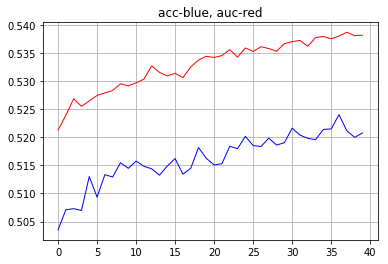

In [7]:

lines = plt.plot(epoch_list, acc_val, epoch_list, auc_list)
l1, l2= lines
plt.setp(lines, linestyle='-')
plt.setp(l1, linewidth=1, color='b')
plt.setp(l2, linewidth=1, color='r')
plt.title('acc-blue, auc-red')
plt.grid()
plt.show()



# ГРАФИЧКИ

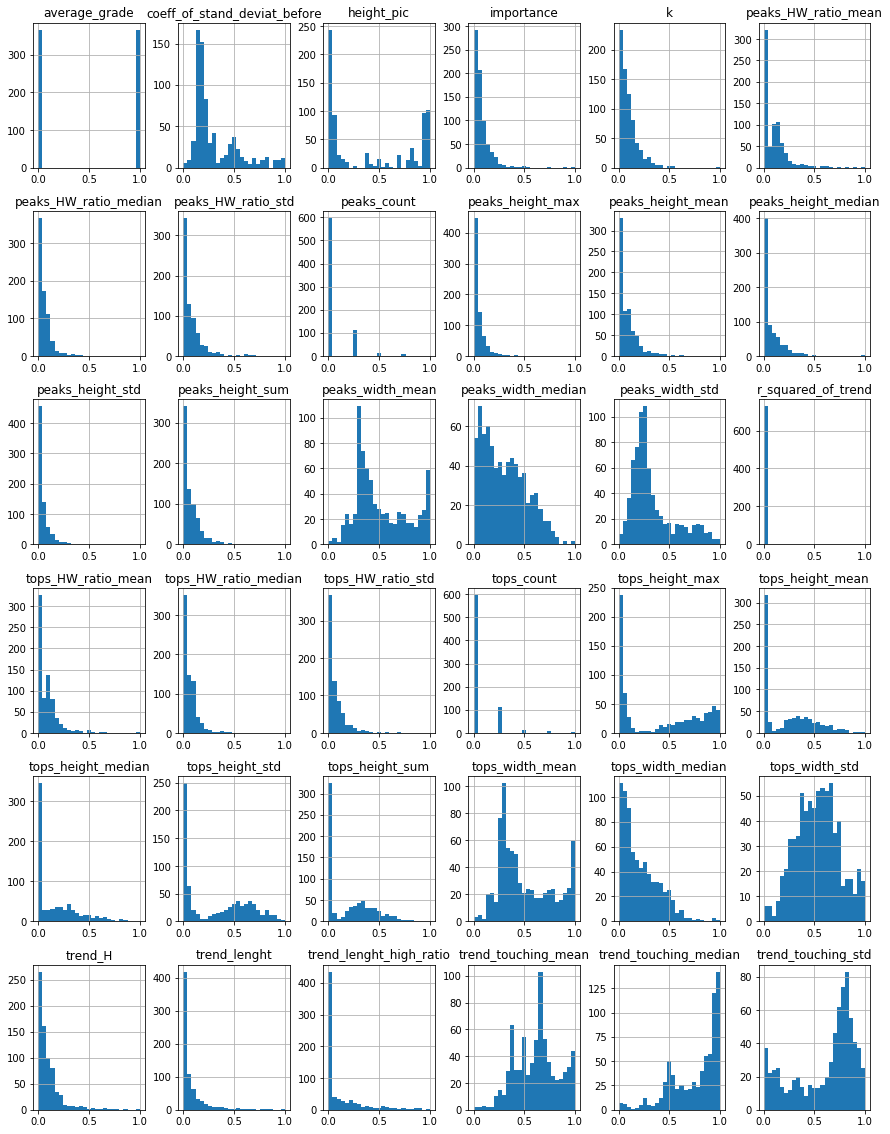

In [14]:
df.hist(bins=25,figsize = (15,20))
plt.show()

# PCA

In [17]:
X = df.drop(columns=[ 'average_grade'])
Y = df[ 'average_grade']

In [141]:
from sklearn.decomposition import PCA
column = 1
pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             )
principalDf.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.401884,-0.447902,0.594141,-0.187507,0.001168,0.061179,-0.301020,0.104298,0.051264,0.024084
1,-0.388229,-0.245634,0.641935,-0.327718,-0.046911,0.100682,-0.257667,0.098007,0.018231,0.015926
2,0.356154,0.732964,-0.009868,0.049491,-0.054412,0.035496,-0.173289,0.207072,0.004995,0.178484
3,0.742784,-0.328294,-0.414603,0.005352,-0.212538,0.014807,0.060077,0.001381,-0.074246,-0.086140
4,-0.358517,-0.209200,0.334197,-0.034649,-0.270026,0.033975,-0.076508,0.085479,-0.027378,0.061985


In [144]:
#сколько вариабельности обьясняет каждая компонента
pca.explained_variance_

array([0.57068446, 0.28044189, 0.17582952, 0.07439888, 0.05409777,
       0.04408872, 0.03827635, 0.02666924, 0.0186501 , 0.01335078])

In [142]:
feature_composition = pd.DataFrame(pca.components_,columns=X.columns)

In [146]:
#первая строка самая важная. Эта компонента обьясняет 57%
#вторая - 28%, тертья - 17.
feature_composition

,importance,k,trend_lenght,r_squared_of_trend,tops_count,peaks_count,height_pic,trend_H,trend_touching_std,trend_touching_mean,trend_touching_median,tops_height_std,tops_height_mean,tops_height_median,tops_height_sum,tops_height_max,peaks_width_std,peaks_width_mean,peaks_width_median,tops_width_std,tops_width_mean,tops_width_median,peaks_height_std,peaks_height_mean,peaks_height_median,peaks_height_sum,peaks_height_max,tops_HW_ratio_std,tops_HW_ratio_mean,tops_HW_ratio_median,peaks_HW_ratio_std,peaks_HW_ratio_mean,peaks_HW_ratio_median,trend_lenght_high_ratio,coeff_of_stand_deviat_before
0,0.005227,-0.013401,0.000120,0.004324,0.016235,0.016235,-0.526962,-0.017210,-0.022723,-0.001204,-0.016629,0.382306,0.298135,0.225698,0.265979,0.493475,0.017305,0.014803,-0.021483,0.008713,0.016347,-0.001405,0.055894,0.097783,0.091313,0.085462,0.055877,0.083669,0.097112,0.074296,0.106054,0.123424,0.066535,-0.185785,0.008578
1,-0.048735,-0.002200,0.042330,-0.012158,-0.042372,-0.042372,0.048737,0.021738,-0.510264,0.319034,0.209786,0.031882,-0.004440,-0.041331,-0.012242,-0.044360,0.373961,0.413239,-0.101863,0.242411,0.425501,-0.021522,0.055233,0.054460,-0.028809,0.045034,0.051981,0.011954,-0.001167,0.003250,0.018877,0.013475,0.006655,-0.013564,-0.066724
2,-0.111565,-0.034729,0.164927,-0.001383,0.055008,0.055008,-0.012343,0.113886,0.173214,0.057686,0.177412,0.072549,-0.160635,-0.220425,-0.133647,0.014157,0.125171,-0.250430,-0.402060,0.337885,-0.254269,-0.371821,0.060372,0.052318,-0.066835,0.049911,0.054654,0.095128,0.095773,0.075316,0.117198,0.099881,0.058508,-0.185851,-0.344160
3,-0.134215,-0.047403,0.126006,-0.030034,-0.230891,-0.230891,0.077188,0.079459,0.216770,-0.380469,-0.550708,0.045781,-0.031817,-0.043887,-0.066337,-0.014871,0.103380,0.243977,0.111428,0.159533,0.234569,0.083873,0.068777,0.109460,0.080011,0.085156,0.063162,0.047646,0.030134,0.018867,0.038820,0.013267,-0.004110,-0.109139,-0.343145
4,0.194684,-0.036541,0.066182,0.091093,0.424180,0.424180,0.112498,-0.048787,-0.174572,-0.182308,-0.404007,0.023099,-0.048924,-0.100284,0.036381,-0.033039,0.126562,0.010276,-0.143329,-0.047731,0.042373,-0.047801,0.090676,0.083183,-0.063443,0.096199,0.087867,0.151074,0.127964,0.095601,0.219056,0.202979,0.097849,0.258701,0.194083
5,0.139824,-0.069573,0.280148,0.016185,0.212955,0.212955,0.133783,0.186506,-0.157240,0.112340,0.144052,-0.098279,0.033696,0.123429,0.060780,-0.124907,-0.118896,-0.061311,0.293186,-0.266693,-0.047109,0.238122,0.051396,0.099223,0.200478,0.098290,0.056589,0.090913,0.045028,-0.004369,0.077288,0.045331,-0.012883,-0.317103,-0.481206
6,-0.085726,-0.162152,0.124968,-0.035264,-0.224701,-0.224701,0.371315,-0.169061,0.099049,0.113823,0.265418,0.191394,-0.004251,-0.049999,-0.038088,0.156184,-0.160454,-0.017883,0.190040,-0.033814,-0.035929,0.081815,0.115339,0.154592,0.058721,0.128251,0.106861,0.211825,0.199064,0.138688,0.276543,0.220618,0.095827,0.371800,0.087916
7,0.011959,0.294501,0.083419,-0.009859,-0.086902,-0.086902,-0.592549,0.285676,0.010719,0.033237,0.069027,-0.111120,-0.261498,-0.256570,-0.258974,-0.211639,-0.026337,0.029665,0.170222,-0.135695,0.023145,0.130018,0.089641,0.083152,-0.022979,0.068526,0.082074,0.121110,0.101969,0.066666,0.153853,0.111170,0.043652,0.125823,0.131346
8,0.029125,-0.000196,0.453719,0.005426,-0.131595,-0.131595,0.099889,0.341241,0.110686,-0.036472,0.025177,-0.285090,0.199499,0.342644,0.157286,-0.140737,0.077868,-0.009302,-0.277702,0.016945,-0.020967,-0.048047,0.089389,0.134895,0.078443,0.109405,0.089286,0.000976,-0.004677,-0.017968,-0.013623,0.013244,0.010671,-0.083873,0.434189
9,-0.007934,0.073288,-0.324901,0.070174,-0.094351,-0.094351,-0.032633,-0.331015,0.066371,-0.025056,0.034929,-0.358769,0.079879,0.223831,0.072941,-0.249278,0.042587,0.042454,-0.150248,-0.032715,0.031128,0.107731,-0.066473,-0.099401,-0.136794,-0.093931,-0.068055,0.163048,0.190769,0.163756,0.323380,0.309351,0.173139,-0.294461,-0.060650


In [132]:
pca.singular_values_

array([20.42474819, 14.31792648, 11.3371679 ,  7.37465823,  6.28851912,
        5.67704658,  5.28961379])

In [42]:
from sklearn.decomposition import PCA
column = 1
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2','pc3', 'pc4'])
finalDf = pd.concat([principalDf, Y], axis= 1)

In [43]:
finalDf.head()

,pc1,pc2,pc3,pc4,average_grade
0,-0.401884,-0.447902,0.594141,-0.187507,0
1,-0.388229,-0.245634,0.641935,-0.327718,1
2,0.356154,0.732964,-0.009868,0.049491,0
3,0.742784,-0.328294,-0.414603,0.005352,0
4,-0.358517,-0.209200,0.334197,-0.034649,1


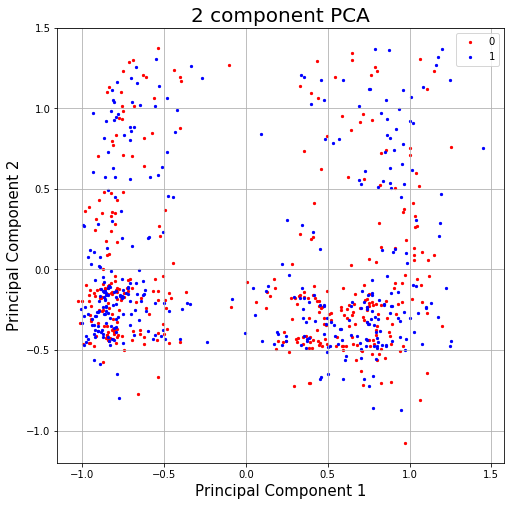

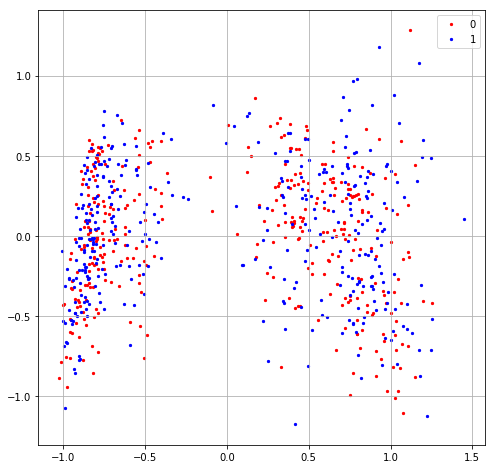

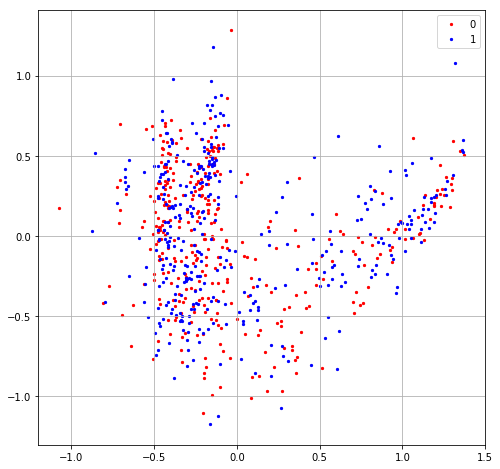

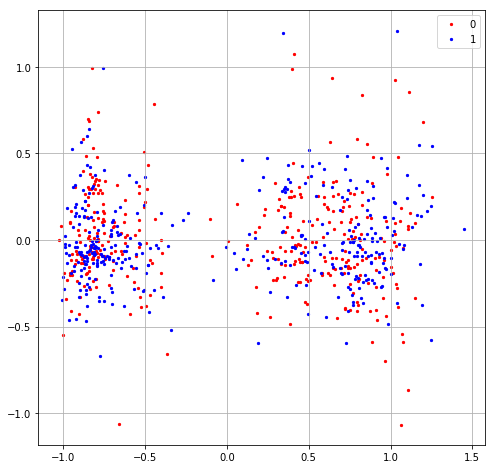

In [48]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['average_grade'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()
plt.show()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
targets = [0, 1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['average_grade'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc3']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()
plt.show()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['average_grade'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc2']
               , finalDf.loc[indicesToKeep, 'pc3']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()
plt.show()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['average_grade'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc4']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()
plt.show()

# CLASSICAL LEARNING

In [99]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures


In [108]:
classifier_LR = LogisticRegression(penalty='l2', n_jobs=4, C=50)

In [109]:
#classifier_LR = RandomForestClassifier

In [110]:
aucs = []
curves = []
f1s = []
accs = []
for i in range (iterations):
    df = df.copy()
    Y_set = df['average_grade']
    X_set = df.drop(columns=[ 'average_grade'])
    index_list_of_whole_dataset = list(range(len(Y_set)))
    
    group_of_items = index_list_of_whole_dataset               # a sequence or set will work here.
    num_to_select = int(len(Y_set)/4)                           # set the number to select here.
    list_of_random_items = random.sample(group_of_items, num_to_select)
    list_of_test_index = list_of_random_items
    list_of_train_index = [x for x in index_list_of_whole_dataset if x not in list_of_test_index]
    
    X_train = X_set.loc[list_of_train_index].values.tolist()
    X_test = X_set.loc[list_of_test_index].values.tolist()
    #print( Y_set.loc[list_of_train_index].describe())
    Y_train = Y_set.loc[list_of_train_index].values.tolist()
    #print( Y_set.loc[list_of_test_index].describe())
    Y_test= Y_set.loc[list_of_test_index].values.tolist()
    #time.sleep(10)
    
    X_train = np.array([np.array(x) for x in X_train])
    X_test = np.array([np.array(x) for x in X_test])
    Y_train = np.array([np.array(x) for x in Y_train])
    Y_test = np.array([np.array(x) for x in Y_test])
    
    if False:
        poly = PolynomialFeatures(2)
        X_train_poly_2 = poly.fit_transform(X_train)
        X_test_poly_2 = poly.fit_transform(X_test)
        
        pca = PCA(0.95)
        X_train_poly_2 = pca.fit_transform(X_train_poly_2)
        X_test_poly_2 = pca.transform(X_test_poly_2)
        
        model = classifier_LR.fit(X_train_poly_2,Y_train)
        preds = model.predict(X_test_poly_2)
        f1s.append(f1_score(Y_test, preds))
        aucs.append(roc_auc_score(Y_test, preds))
        accs.append(accuracy_score(Y_test, preds))
        curves.append(roc_curve(Y_test, preds))
    if False:
        model = classifier_LR.fit(X_train,Y_train)
        preds = model.predict(X_test)
        f1s.append(f1_score(Y_test, preds))
        aucs.append(roc_auc_score(Y_test, preds))
        accs.append(accuracy_score(Y_test, preds))
        curves.append(roc_curve(Y_test, preds))
        
    if True:
        poly = PolynomialFeatures(2)
        X_train_poly_2 = poly.fit_transform(X_train)
        X_test_poly_2 = poly.fit_transform(X_test)

        model = classifier_LR.fit(X_train_poly_2,Y_train)
        preds = model.predict(X_test_poly_2)
        f1s.append(f1_score(Y_test, preds))
        aucs.append(roc_auc_score(Y_test, preds))
        accs.append(accuracy_score(Y_test, preds))
        curves.append(roc_curve(Y_test, preds))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(self.n_jobs))


In [111]:
np.array(aucs).mean()

0.5203882570986252

In [112]:
np.array(aucs).std()

0.03397326691833835

In [113]:
np.array(f1s).mean()

0.5125788404773371

In [114]:
np.array(accs).mean()

0.5188069216757741

In [115]:
np.array(accs).std()

0.03420794003303005